In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optim

from itertools import product

# Always make it pretty.
plt.style.use('ggplot')

import samplers as spl

# Model Estimation

Our goal today is to begin **fitting statistical models to data**.  At the end of the day we will be able to answer questions like:

  - While getting ready for work, after waking up at 6:00, you observe busses stopping at your bus stop at 6:12, 6:15, 6:20, 6:21, and 6:30, after which you leave to the bus stop at 6:33.  What is the probability you will have to wait longer than 5 minutes for the next bus?
  - You survey 100 randomly chosen students from a university, and find that their average height is 1.6 meters, with 25% of them taller than 1.8 meters.  If the university has 5000 students, approximately how many are taller than 2 meters?
  - Your friend's class notes refer to pages 11, 15, 55, 57, 102, 104, and 202 of a book.  What is a good estiamte for the number of pages in the book?

The process for solving problems like this goes:

1. Use domain knowledge or creativity to create a **statistical model** for your data, this is a *catalouge* of possible ways that the data may have been generated.
1. **Fit** the statistical model to the data.  This selects **exactly one** of the data generating processes from your catalouge.
1. Use the fit model to **compute** the thing you wany.

The process above is the most basic form of **statistics**.

## A Review of Fundamental Concepts

### Random Variables, Again.

Recall that a *random variable* $X$ is an object that can be used to generate numbers, in a way that valid probabilistic statements about the generated numbers can be made.  For example:

$$ P(X > 0) = 0.5 $$
$$ P(-1 < X < 1) = 0.25 $$
$$ P(X < 0) = 0 $$
$$ P(X > 1 \mid X > 0) = 0.5 $$

are all probabilistic statements about an unknown random variable.

From a programming perspective, a random variable is a type of object that implements a single public function: `sample`.

In [2]:
class RandomVariable(object):
    
    def __init__(self, parameters):
        self._parameters = parameters
        
    def sample(self):
        '''Return a random sample from the variable.'''
        return algorithm_for_sampling_from_this_variable()

### Distribution and Density Functions

One very general probabilistic statement we can make about a random variable is to compute the *function*

$$ F_X(t) = P(X \leq t) $$

this is called the *cumulative density* or *distribution* function.  In a sense we could make precise, it says everything we can hope to say about the random variable.

If the distribution function is differentiable, then it's derivative is called the *probability density function*. 

$$ f_X(t) = F_X'(t) $$

The density function satisfies the following property

$$ P(t_0 < X \leq t_1) = \int_{t_0}^{t_1} f(t) dt $$

### Independent and Identically Distributed

If two random variables have the *same* distribution function, we say they are *identically distributed*, and we denote this relationship

$$ X \sim Y $$

In practice this means **any probabilistic statements we make about $X$ and $Y$ have the same answer**.

## A Sampling of Continuous Distributions

### The Uniform Distribution

A *uniformly distributed random variable* is any random variable with the following distribution function

$$ F_{\text{Uniform(a, b)}}(t) = \left\{ \begin{array}{ll} 
0 & t \leq a \\
\frac{1}{b - a}t - \frac{a}{b-a} & a < t \leq b \\
1 & t \geq b \\
\end{array} \right.
$$

with corresponding density function

$$ f_{\text{Uniform(a, b)}}(t) = \left\{ \begin{array}{ll} 
0 & t \leq a \\
b - a & a < t \leq b \\
0 & t \geq b \\
\end{array} \right.
$$

The numbers $a$ and $b$ can be set to anything, as long as $a < b$.  These are called the *parameters* of the distribution.

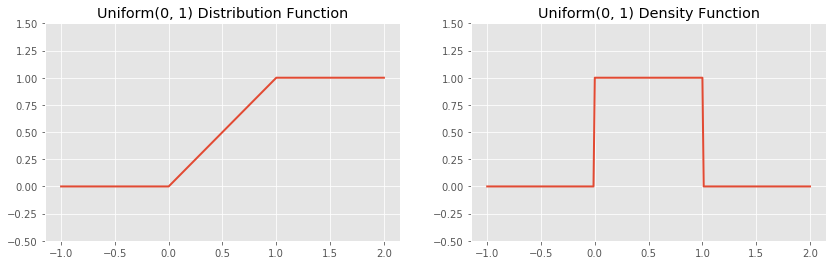

In [3]:
unif = spl.Uniform(0, 1)

x = np.linspace(-1, 2, num=250)
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

ax[0].plot(x, unif.cdf(x), linewidth=2)
ax[0].set_ylim(-0.5, 1.5)
ax[0].set_title("Uniform(0, 1) Distribution Function")

ax[1].plot(x, unif.pdf(x), linewidth=2)
ax[1].set_ylim(-0.5, 1.5)
ax[1].set_title("Uniform(0, 1) Density Function")

If we sample from a random variable many times, and draw a histogram of the resulting values, the picture will approximate the density function of the random variable

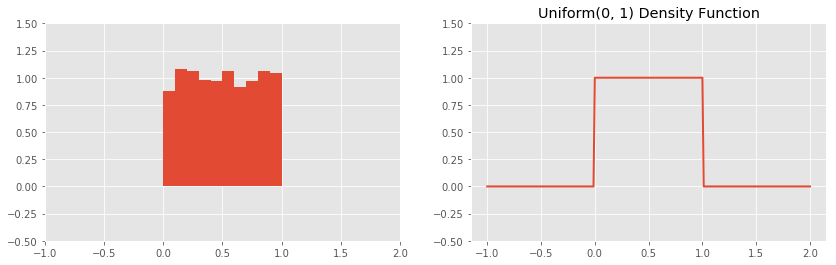

In [4]:
unif_samples = unif.sample(2500)

x = np.linspace(-1, 2, num=250)
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

ax[0].hist(unif_samples, normed=True)
ax[0].set_xlim(-1, 2)
ax[0].set_ylim(-0.5, 1.5)
ax[1].set_title("Histogram of Samples from a Uniform(0, 1)")

ax[1].plot(x, unif.pdf(x), linewidth=2)
ax[1].set_ylim(-0.5, 1.5)
ax[1].set_title("Uniform(0, 1) Density Function")

**Question:** What are some real life examples of uniform random variables?

### The Exponential Distribution

An *exponentially distributed random variable* is any random variable with the following distribution function

$$ F_{\text{Exponential(a)}}(t) = 1 - e^{-at} $$

or, equivalently, the following density function

$$ f_{\text{Exponential(a)}}(t) = a e^{at} $$

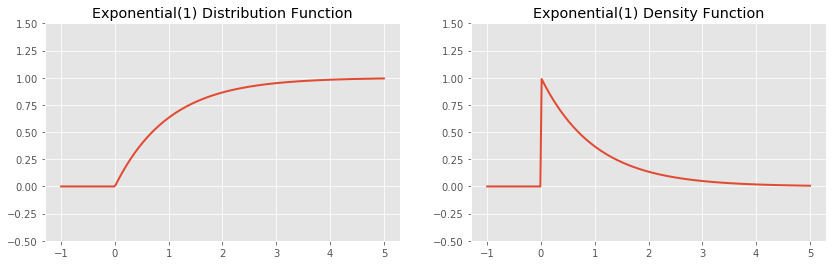

In [5]:
expon = spl.Exponential(1)

x = np.linspace(-1, 5, num=250)
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

ax[0].plot(x, expon.cdf(x), linewidth=2)
ax[0].set_ylim(-0.5, 1.5)
ax[0].set_title("Exponential(1) Distribution Function")

ax[1].plot(x, expon.pdf(x), linewidth=2)
ax[1].set_ylim(-0.5, 1.5)
ax[1].set_title("Exponential(1) Density Function")

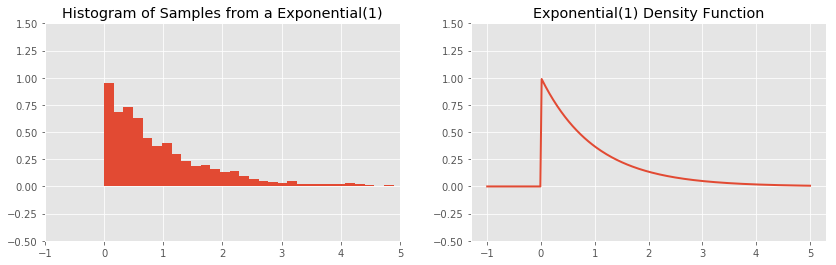

In [6]:
expon_samples = expon.sample(2500)

x = np.linspace(-1, 5, num=250)
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

ax[0].hist(expon_samples, bins=50, normed=True)
ax[0].set_xlim(-1, 5)
ax[0].set_ylim(-0.5, 1.5)
ax[0].set_title("Histogram of Samples from a Exponential(1)")

ax[1].plot(x, expon.pdf(x), linewidth=2)
ax[1].set_ylim(-0.5, 1.5)
ax[1].set_title("Exponential(1) Density Function")

**Question:** What are some real life examples of some exponential random variables?

### The Normal (Gaussian) Distribution

The *normal* or *gaussian* distribution has a hallowed place in statistical folklore, mostly due to the *central limit theorem* which we will study shortly.

The traditional notation for a normal random variable is $Z$ (instead of $X$, used for pretty much any other random variable).

A normal random variable $Z$ has the distribution function

$$ \Phi (t) = \frac{1}{\sqrt{2 \sigma^2 \pi}} \int_{- \infty}^t e^{ - \frac{(x - \mu)^2}{2 \sigma^2} } dx $$

The $\Phi$ is, again, traditional notation for the distribution function of a normal random variable. 

By differentiating, we get the density function of a normal random variable

$$ \phi (t) \frac{1}{\sqrt{2 \sigma^2 \pi}} e^{ - \frac{(x - \mu)^2}{2 \sigma^2} } $$

This indefinite integral does *not* have a closed form.  In practice, the only way to compute values of the distribution function of a normal random variable is to use a computer.

The $\mu$ and $\sigma$ are the parameters of the distribution.  

Changing $\mu$ translates the distribution function to the right and left

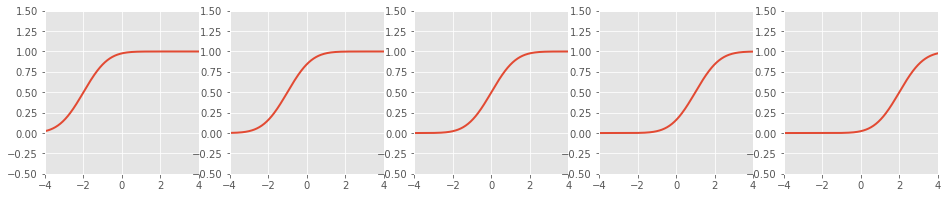

In [7]:
normal_dists_varying_mean = [
    spl.Normal(mu, 1) for mu in [-2, -1, 0, 1, 2]
]

x = np.linspace(-4, 4, num=250)
fig, axs = plt.subplots(1, 5, figsize=(16, 3))

for i, ax in enumerate(axs.flatten()):
    ax.plot(x, normal_dists_varying_mean[i].cdf(x), linewidth=2)
    ax.set_ylim(-0.5, 1.5)
    ax.set_xlim(-4, 4)

Changing $\sigma$ stretches and shrinks the distribution function horisontally

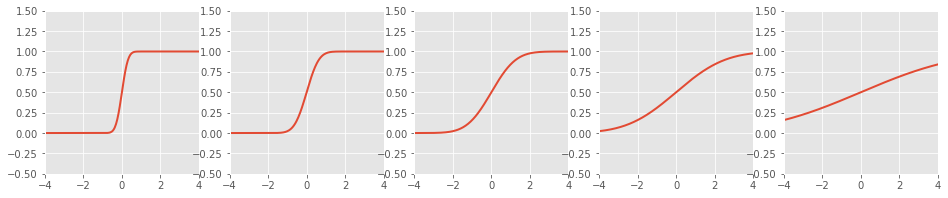

In [8]:
normal_dists_varying_sigma = [
    spl.Normal(0, sigma) for sigma in [0.25, 0.5, 1, 2, 4]
]

x = np.linspace(-4, 4, num=250)
fig, axs = plt.subplots(1, 5, figsize=(16, 3))

for i, ax in enumerate(axs.flatten()):
    ax.plot(x, normal_dists_varying_sigma[i].cdf(x), linewidth=2)
    ax.set_ylim(-0.5, 1.5)
    ax.set_xlim(-4, 4)

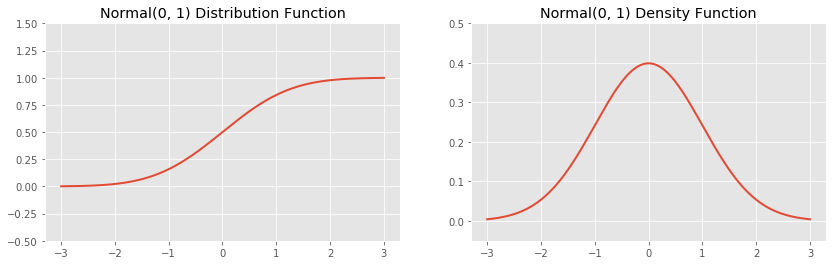

In [9]:
normal = spl.Normal(0, 1)

x = np.linspace(-3, 3, num=250)
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

ax[0].plot(x, normal.cdf(x), linewidth=2)
ax[0].set_ylim(-0.5, 1.5)
ax[0].set_title("Normal(0, 1) Distribution Function")

ax[1].plot(x, normal.pdf(x), linewidth=2)
ax[1].set_ylim(-0.05, 0.5)
ax[1].set_title("Normal(0, 1) Density Function")

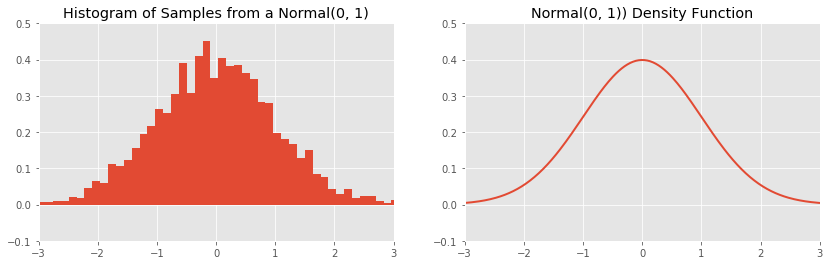

In [10]:
normal_samples = normal.sample(2500)

x = np.linspace(-3, 3, num=250)
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

ax[0].hist(normal_samples, bins=50, normed=True)
ax[0].set_xlim(-3, 3)
ax[0].set_ylim(-0.1, 0.5)
ax[0].set_title("Histogram of Samples from a Normal(0, 1)")

ax[1].plot(x, normal.pdf(x), linewidth=2)
ax[1].set_xlim(-3, 3)
ax[1].set_ylim(-0.1, 0.5)
ax[1].set_title("Normal(0, 1)) Density Function")

**Discussion:** How would the above discussion change if we had *discrete* random variables?  What are some important examples of discrete random variables?

## Probability vs. Statistics

Probability and Statistics are closely related subjects, but there is a fundamental difference.

### Probability

In **probability** we *know* the parameters of a distribution (associated with some random variable), and we would like to study properties of data generated from that distribution.

Example properties of random varaibles are:

The **expectation** of a random varaible is defined by:

$$ E[X] = \int_{- \infty}^{\infty} t \
f_{X}(t) dt $$

and the **variance** is defined by

$$ V[X] = E \left[ (X - E[X])^2 \right] $$

If you *know* the parameters of the distribution, then you can *compute* the mean and variance.

**Q:** What are the mean and variance of a normal distribution?  What is the mean of the exponential distribution?  Can you compute it?  Hint: Integration by parts.

### Statistics

In **statistics** we have data generated from a random variable, and we would like to *infer* properties of its distribution.

A few points are evident:

  - Independent and identically distributed data are important, as they allow us to pool information using data all generated from *indistinguishable* random variables.
  - We can never know *exactly* the parameters that generated the data, we can only hope to approximate them.
  - We *may* be able to quantify the uncertainty in our approximation, this is what much of classical statistics is about.

**Question**: Statistics, in its early days, was called *inverse probability*.  Can you see why?

## Statistical Models

So, we arrive at a very fundamental question:  **Just want is a statistical model anyway?**

Suppose we have some static, fixed data.  Here's an example dataset:

In [11]:
data = spl.secret_data()
print(data)

[-0.63721416 -0.09244678  0.58892281  0.68327022  0.17381805 -1.03439937
 -1.74848467  0.2255848   0.42319962  0.66304942  0.21609598 -0.43926129
  0.41599975 -0.11060289  0.72158282 -0.34712306  0.617901    1.52943323
 -0.12881863  0.75294423  0.61217306 -0.30959253  0.49260952  0.48276324
  1.33706321 -0.79459995 -0.76025656 -0.61604207 -0.85713652 -0.45759442
  0.28735065  0.82361452  0.24398895  0.3879454   0.86193129 -0.61008793
  0.07648622 -0.1435058   0.25890366 -0.10213167 -0.01764953 -0.04308774
 -1.60378619 -0.28511826 -0.12598123  0.205908   -0.34063853  0.17340274
  0.1621707  -0.11489715]


We'll probably learn more if we actually draw some pictures of this data set.  For a one dimensional data set there are a few options, but a scatter plot is always a good default choice because it

  - Shows all the data
  - Is easy to interpret
  - Doesn't lose any information

In [12]:
def one_dim_scatterplot(data, ax, jitter=0.2, **options):
    if jitter:
        jitter = np.random.uniform(-jitter, jitter, size=data.shape)
    else:
        jitter = np.repeat(0.0, len(data))
    ax.scatter(data, jitter, **options)
    ax.yaxis.set_ticklabels([])
    ax.set_ylim([-1, 1])

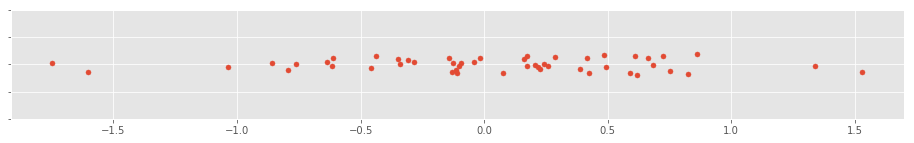

In [13]:
fig, ax = plt.subplots(1, figsize=(16, 2))
one_dim_scatterplot(data, ax, s=25)

Another possibility for one dimensional data visualization is to plot the **empirical distribution function**:

In [105]:
def emperical_distribution(x, data):
    weight = 1.0 / len(data)
    count = np.zeros(shape=len(x))
    for datum in data:
        count = count + np.array(x >= datum)
    return weight * count

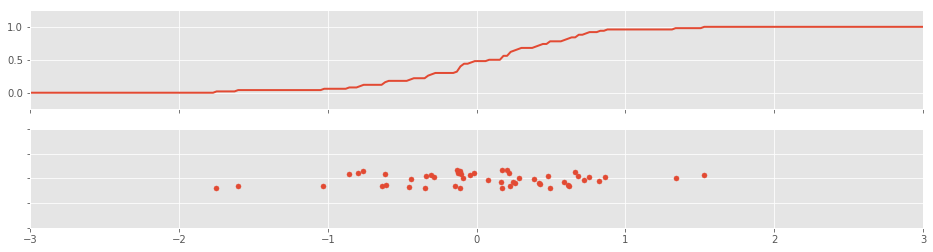

In [15]:
fig, ax = plt.subplots(2, 1, figsize=(16, 4), sharex=True)

x = np.linspace(-3, 3, num=250)
ax[0].plot(x, emperical_distribution(x, data), linewidth=2)
ax[0].set_ylim(-0.25, 1.25)
ax[0].set_xlim(-3, 3)
one_dim_scatterplot(data, ax[1], s=25)

**Question:** How is the EDF drawn? When does it increase?  How much does it increase each time?  What is it attempting to approximate?

We would like to do some statistics, that is, go **from** the data, **to** an understanding of a process that may have generated the data.

### Definition

A **statistical model** is a collection of random variables, each of which is hypothesized to possibly have generated the data.  Different random variables in the collection are usually distinguished by **parameters**.

**Fitting a statistical model to data** is any process that combines a model with data, and uses the data to select one and only one random variable from the model.  This often takes the form of **determining the parameters for one and only one of the random variables in the model**.  These estimated values of the parameters are called **parameter estimates**.

**Warning:** This terminology is one of the *most abused* in all of statistics.  Formally, the *model* is a **collection** of possible data generating process, but *everyone* also refers to the *single* object you get after fitting the model to data as "the model".  **Seriously everyone does this**, but it's technically incorrect.

**Questions**:
    
What are appropriate statistical models for the following situations:
    
  - You ride an airplane and observe if you catch the flu.
  - You count the number of busses stopping at a bus stop in a given interval of time.  
  - You randomly choose students from a university, and measure their heights.

### Example: Normal Distribution with Unknown Mean, and Known Variance.

Let's fit a model to our data from before.  Suppose we know, because we are smart and can infer such things, that our data is generated from a normal distribution with **unknown mean**, but we know the variance is $1$, (this is not something you can generally know, we're assuming it here just for simplicity).

Then, our **statistical model** is the following collection of random variables:

$$ M = \{ N(\mu, 1) \mid \mu \in \mathbb{R} \} $$

The **parameters** at play are the unknown mean of the normal distribution.

Fitting the model to data is any process that selects exactly *one* of these distributions.  This reduces, in this case, to selecting the mean parameter $\mu$ of the unknown normal distribution.

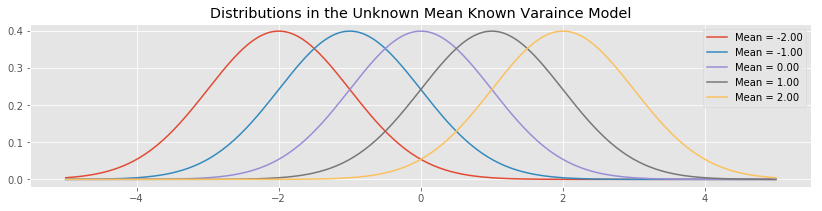

In [16]:

x = np.linspace(-5, 5, num=250)
fig, ax = plt.subplots(figsize=(14, 3))

means = np.linspace(-2, 2, num=5)
for mean in means:
    normal = spl.Normal(mean, 1)
    ax.plot(x, normal.pdf(x), label="Mean = {:2.2f}".format(mean))
    
ax.legend()
ax.set_title("Distributions in the Unknown Mean Known Varaince Model")

Fitting the model to data is any process that selects exactly *one* of these distributions.  This reduces, in this case, to selecting the mean parameter $\mu$ of the unknown normal distribution.

### The Eyeball Method

Let's fit our model with the **eyeball method**, we will sample new data sets of the same size as our data from normal distributions of varying mean, and then pick the distribution that best resembles our data.

In [17]:
def text_in_blank_plot(text, ax):
    _ = ax.text(0.5, 0.5, text, 
                horizontalalignment='center',
                verticalalignment='center',
                fontsize=22)
    ax.axis('off')

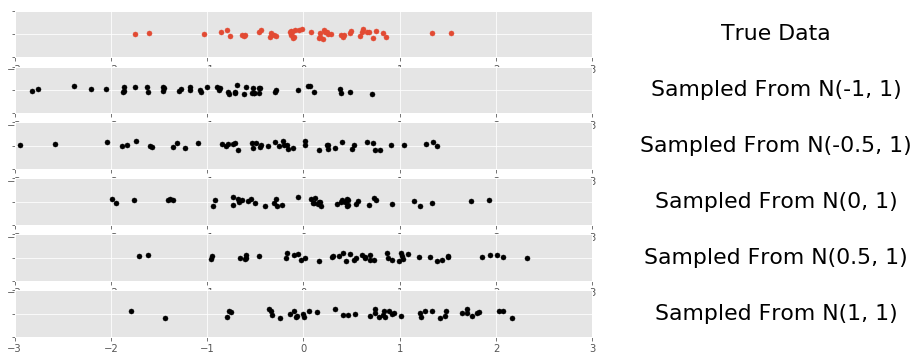

In [18]:
means = [-1, -0.5, 0, 0.5, 1]

fig = plt.figure(figsize=(16, 6)) 
ax = plt.subplot2grid((6, 3), (0, 0), colspan=2)
ax.set_xlim(-3, 3)
one_dim_scatterplot(data, ax, s=25)
ax = plt.subplot2grid((6, 3), (0, 2), colspan=1)
text_in_blank_plot("True Data", ax)

for i, mu in enumerate(means):
    normal = spl.Normal(mu, 1)
    sample = normal.sample(50)
    ax = plt.subplot2grid((6, 3), (i + 1, 0), colspan=2)
    ax.set_xlim(-3, 3)
    one_dim_scatterplot(sample, ax, s=25, c="black")
    ax = plt.subplot2grid((6, 3), (i + 1, 2), colspan=1)
    text_in_blank_plot("Sampled From N({}, 1)".format(mu), ax)

It's kind of hard to eyeball here, but it looks like either $N(0, 1)$ or $N(-0.5, 1)$ is our best choice.

This eyeball method clearly has some downfalls

  - To make it feasible, we needed to discrete the values of $\mu$ we were considering to a small set.  It would be better to consider *all* the possible $\mu$'s at once.
  - If there were more parameters, mean and variance for example, the number of candidate distributions we needed to consider would grow exponentially.
  - It's hard to eyeball which candidate looks best by comparing simulated to real data.  Better would be a disciplined measurement of "how different are the datasets".

Two methods the *method of moments* and the *method of maximum likelihood* have been developed to address the above concerned.

### Method of Moments

The *method of moments* is the older method of model fitting.

Suppose we are fitting a *one parameter* statistical model to some known data.  **Recall** that a statistical model is a set of candidate distributions (or, random variables), one of which we suspect generated the data.  The *method of moments* chooses the candidate model as follows:

  - Compute the population expectation (i.e., the expectation) of each of the distributions in the model.  This part takes math, or at least Wikipedia.  The result will be some function of the parameter.
  - Compute the sample mean of the data.  This is a number.
  - Equate the population and sample means, solve for the parameter.
  
The solution is the *method of moments* estimate of the parameter.

### Example: MOM Estimate for Single Parameter Normal Model.

Let's compute the method of moments estimator for the model from our previous example.

$$ M = \{ N(\mu, 1) \mid \mu \in \mathbb{R} \} $$

The population mean of a distribution $N(\mu, 1)$ is simply $\mu$.  Easy.

The sample mean of our data is

In [19]:
mu_hat = np.mean(data)
print(mu_hat)

0.0339531227762


The method of moments estimate is then found by equating the population mean with the sample mean, which is easy in this case.

$$ \hat \mu = 0.034 $$

We can check that our estimate is sensible by comparing our original data set with samples drawn from the fit distribution.

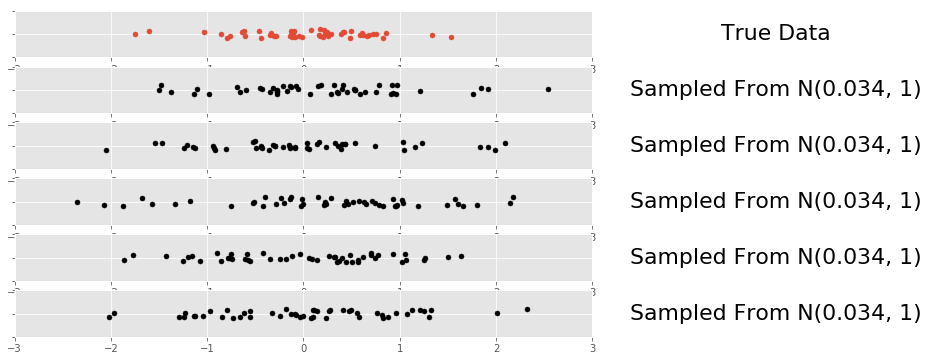

In [20]:
fig = plt.figure(figsize=(16, 6)) 
ax = plt.subplot2grid((6, 3), (0, 0), colspan=2)
ax.set_xlim(-3, 3)
one_dim_scatterplot(data, ax, s=25)
ax = plt.subplot2grid((6, 3), (0, 2), colspan=1)
text_in_blank_plot("True Data", ax)

for i, mu in enumerate(means):
    normal = spl.Normal(mu_hat, 1)
    sample = normal.sample(50)
    ax = plt.subplot2grid((6, 3), (i + 1, 0), colspan=2)
    ax.set_xlim(-3, 3)
    one_dim_scatterplot(sample, ax, s=25, c="black")
    ax = plt.subplot2grid((6, 3), (i + 1, 2), colspan=1)
    text_in_blank_plot("Sampled From N({0:0.3f}, 1)".format(mu_hat), ax)

There are two other ways we could visualize the fit of our model to the data.

*First* we can superimpose the density function of the fit random variable over a histogram of our data:

In [21]:
def superimpose_pdf_of_fit_model(data, model, ax, x_lower=-3, x_upper=3):
    x = np.linspace(x_lower, x_upper, num=250)
    _ = ax.hist(data, bins=25, normed=True, color="black", alpha=0.4)
    ax.plot(x, model.pdf(x), linewidth=3)

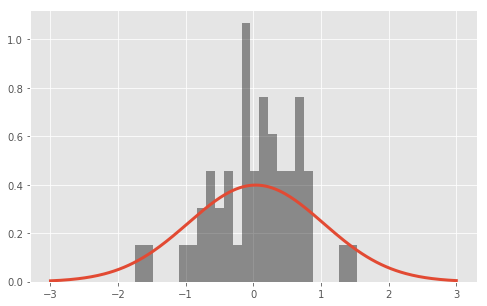

In [22]:
fit_one_param_model = spl.Normal(mu_hat, 1)

fig, ax = plt.subplots(1, figsize=(8, 5))
superimpose_pdf_of_fit_model(data, fit_one_param_model, ax)

We could also superimpose the empirical distribution function of our data over the *actual* distribution function of the fit model.

In [23]:
def superimpose_cdf_of_fit_model(data, model, ax, x_lower=-3, x_upper=3):
    x = np.linspace(x_lower, x_upper, num=250)
    ax.plot(x, emperical_distribution(x, data), linewidth=2)
    ax.plot(x, model.cdf(x), linewidth=2)

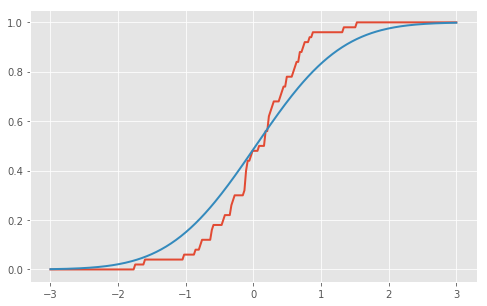

In [24]:
fig, ax = plt.subplots(1, figsize=(8, 5))
superimpose_cdf_of_fit_model(data, fit_one_param_model, ax)

The fit looks ok, but not great.  We can see this clearly in the overlay of the distribution functions, the empirical distribution function of that data increases much faster than that of the fit model.

**Discussion:** How does this plot suggest that we modify our model to acheive a better fit to our data?

### Example: Method of Moments for a Two Parameter Normal Model

Now suppose we expand our model to *two* parameters

$$ M = \{ N(\mu, \sigma^2) \mid \mu \in \mathbb{R}, \sigma^2 \in \mathbb{R}^+ \} $$

The method of moments generalizes easily

  - Compute the population mean *and variance* of each of the distributions in the model.
  - Compute the sample mean *and sample variance* of the data.
  - Equate the population and sample means, and population and sample variances.  The result will be two equations in two unknowns.  Solve for the parameters.

In our running example, the sample means and standard deviations are

In [25]:
mu_hat = np.mean(data)
sigma_sq_hat = np.var(data)
print("Sample Mean: {0:1.3f}".format(mu_hat))
print("Sample Variance: {0:1.3f}".format(sigma_sq_hat))

Sample Mean: 0.034
Sample Variance: 0.414


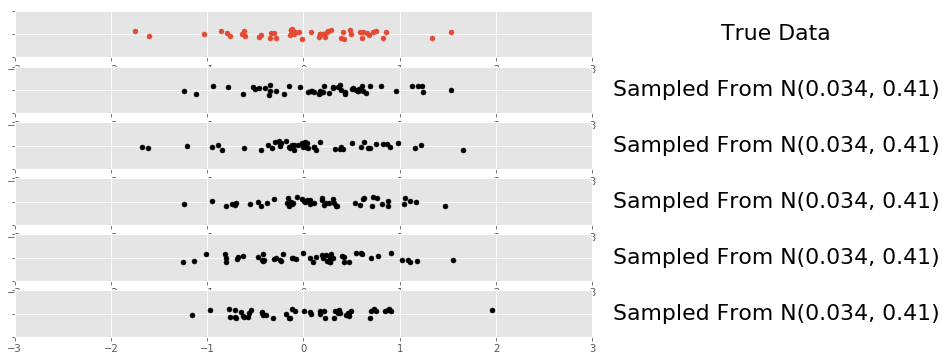

In [26]:
fig = plt.figure(figsize=(16, 6)) 
ax = plt.subplot2grid((6, 3), (0, 0), colspan=2)
ax.set_xlim(-3, 3)
one_dim_scatterplot(data, ax, s=25)
ax = plt.subplot2grid((6, 3), (0, 2), colspan=1)
text_in_blank_plot("True Data", ax)

for i, mu in enumerate(means):
    normal = spl.Normal(mu_hat, np.sqrt(sigma_sq_hat))
    sample = normal.sample(50)
    ax = plt.subplot2grid((6, 3), (i + 1, 0), colspan=2)
    ax.set_xlim(-3, 3)
    one_dim_scatterplot(sample, ax, s=25, c="black")
    ax = plt.subplot2grid((6, 3), (i + 1, 2), colspan=1)
    text_in_blank_plot("Sampled From N({0:0.3f}, {1:0.2f})".format(mu_hat, sigma_sq_hat), ax)

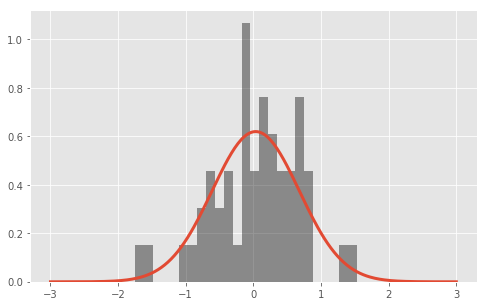

In [27]:
fit_two_param_model = spl.Normal(mu_hat, np.sqrt(sigma_sq_hat))

fig, ax = plt.subplots(1, figsize=(8, 5))
superimpose_pdf_of_fit_model(data, fit_two_param_model, ax)

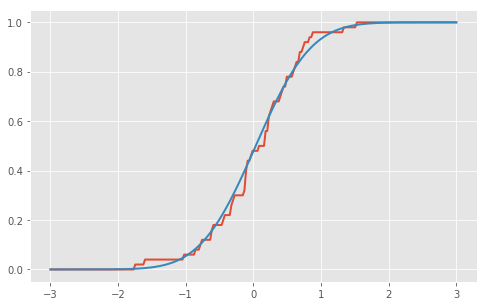

In [28]:
fig, ax = plt.subplots(1, figsize=(8, 5))
superimpose_cdf_of_fit_model(data, fit_two_param_model, ax)

### Example:  An Awful Model Specification

We haven't had much to say about how to *choose* an appropriate model, and doing so badly can be disastrous.

Consider the following data generating process

  - Flip a coin
      - If the coin lands heads, sample a point from a $\text{Unif}(-1.5, 1.5)$.
      - If the coin is tails, flip another coin
          - If the coin is heads, sample a point from a $\text{Unif}(-1.5, -0.5)$
          - If the coin is tails, sample a point from a $\text{Unif}(0.5, 1.5)$
          
This kind of process creates what is termed a **mixture** distribution.

In [29]:
def generate_uniform_mixture(n):
    unif1 = spl.Uniform(-1.5, -0.5).sample(n)
    unif2 = spl.Uniform(0.5, 1.5).sample(n)
    unif3 = spl.Uniform(-1.5, 1.5).sample(n)
    bernoulli = spl.Binomial(1, 0.5).sample(n)
    bernoulli2 = spl.Binomial(1, 0.5).sample(n)
    return bernoulli * unif1 + (1 - bernoulli) * (
        bernoulli2 * unif2 + (1 - bernoulli2) * unif3 
    )

In [30]:
np.random.seed(154)
unif_mixture_data = generate_uniform_mixture(100)

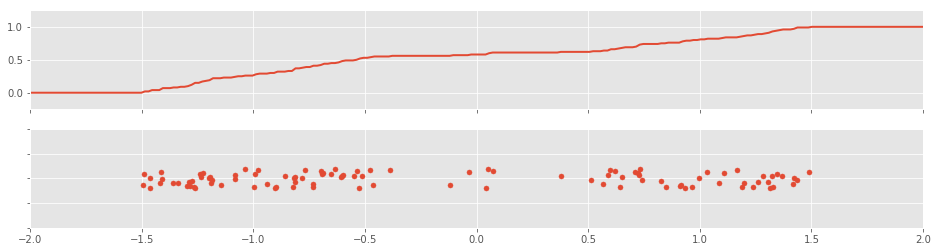

In [31]:
fig, ax = plt.subplots(2, 1, figsize=(16, 4), sharex=True)

x = np.linspace(-2, 2, num=250)
ax[0].plot(x, emperical_distribution(x, unif_mixture_data), linewidth=2)
ax[0].set_xlim(-2, 2)
ax[0].set_ylim(-0.25, 1.25)
one_dim_scatterplot(unif_mixture_data, ax[1], s=25)

Suppose we specified a model *without visualizing the data*.  This seems insane, but it is routine in some disciplines (don't do this).

Let's pick a badly specified model

$$ M = \{ \text{Unif}(a, b) \mid a < b \} $$

That is, our model assumes that the data is generated from a *single* uniform distribution.

The population mean and variance of the uniform distribution is

$$ \mu = \frac{a + b}{2} $$
$$ \sigma^2 = \frac{(b - a)^2}{12} $$

The sample mean and variance are

In [32]:
mu_hat = np.mean(unif_mixture_data)
sigma_sq_hat = np.var(unif_mixture_data)
print("Sample Mean: {0:1.3f}".format(mu_hat))
print("Sample Varaince: {0:1.3f}".format(sigma_sq_hat))

Sample Mean: -0.159
Sample Varaince: 0.994


So the equations for the MOM estimate are

$$ \frac{a + b}{2} = -0.159 $$
$$ \frac{(b - a)^2}{12} = 0.994 $$

Whose solutions can be found as

$$ a = -0.159 - \sqrt{3 \times 0.994} $$
$$ b = -0.159 + \sqrt{3 \times 0.994} $$

**Exercise:** Do all the math.

In [33]:
a, b = mu_hat - np.sqrt(3 * sigma_sq_hat), mu_hat + np.sqrt(3 * sigma_sq_hat)

print("a = {0:2.2f}").format(a)
print("b = {0:2.2f}").format(b)

a = -1.89
b = 1.57


The poor fit of our model is clear when comparing simulated data to the truth

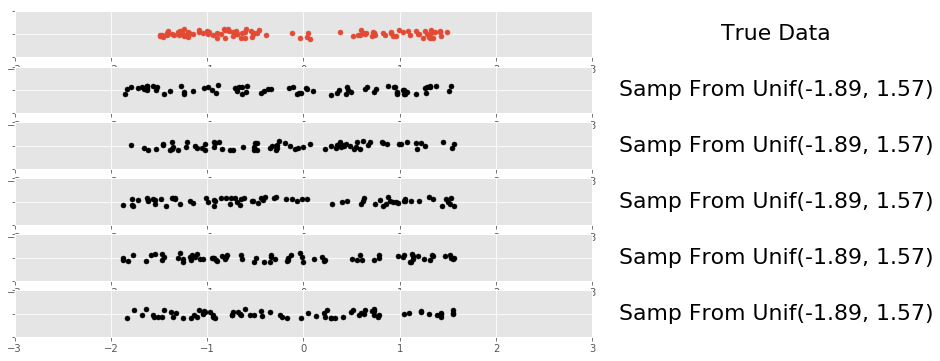

In [34]:
fig = plt.figure(figsize=(16, 6)) 
ax = plt.subplot2grid((6, 3), (0, 0), colspan=2)
ax.set_xlim(-3, 3)
one_dim_scatterplot(unif_mixture_data, ax, s=25)
ax = plt.subplot2grid((6, 3), (0, 2), colspan=1)
text_in_blank_plot("True Data", ax)

for i, mu in enumerate(means):
    unif = spl.Uniform(a, b)
    sample = unif.sample(75)
    ax = plt.subplot2grid((6, 3), (i + 1, 0), colspan=2)
    ax.set_xlim(-3, 3)
    one_dim_scatterplot(sample, ax, s=25, c="black")
    ax = plt.subplot2grid((6, 3), (i + 1, 2), colspan=1)
    text_in_blank_plot("Samp From Unif({0:2.2f}, {1:2.2f})".format(a, b), ax)

**All** of the samples from our simulated data is outside of the extremes set by the true data.  Furthermore, most of the samples from the simulated data is too dense in the middle, and not dense enough in the extremes.

**Question:** Why did the fit distributions *always* have bigger variance than the data?  Is there something about the structure of the data that should have clued us into this?

We can get an even better look at this using histograms

The bad fit of our model to the data would cause anything we learn from it to be a bad approximation to the truth.  We clearly need to develop tools to help us better specify models.

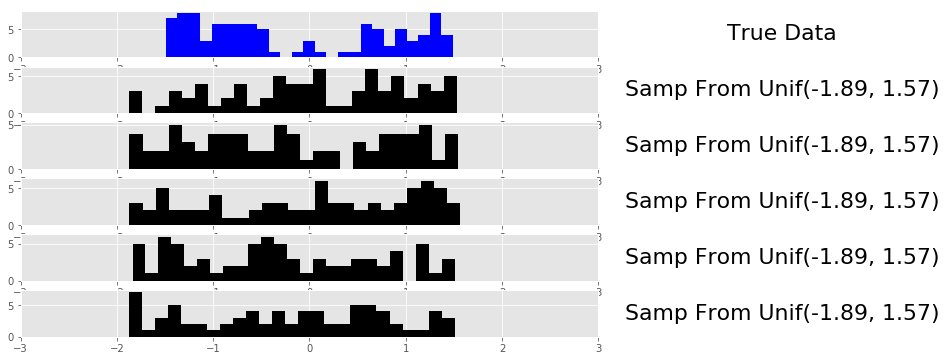

In [35]:
fig = plt.figure(figsize=(16, 6)) 
ax = plt.subplot2grid((6, 3), (0, 0), colspan=2)
ax.set_xlim(-3, 3)
ax.hist(unif_mixture_data, bins=25, color="blue")
ax = plt.subplot2grid((6, 3), (0, 2), colspan=1)
text_in_blank_plot("True Data", ax)

for i, mu in enumerate(means):
    unif = spl.Uniform(a, b)
    sample = unif.sample(75)
    ax = plt.subplot2grid((6, 3), (i + 1, 0), colspan=2)
    ax.set_xlim(-3, 3)
    ax.hist(sample, bins=25, color="black")
    ax = plt.subplot2grid((6, 3), (i + 1, 2), colspan=1)
    text_in_blank_plot("Samp From Unif({0:2.2f}, {1:2.2f})".format(a, b), ax)

And finally, superimposing the fit density and distribution functions gives even more information.

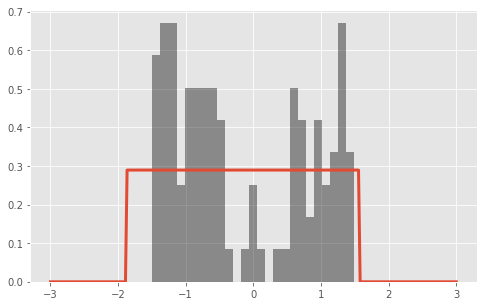

In [36]:
fit_unif_model = spl.Uniform(a, b)

fig, ax = plt.subplots(1, figsize=(8, 5))
superimpose_pdf_of_fit_model(unif_mixture_data, fit_unif_model, ax)

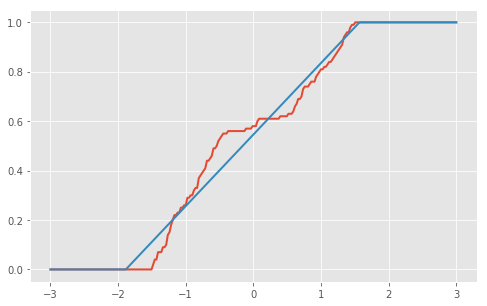

In [37]:
fit_unif_model = spl.Uniform(a, b)

fig, ax = plt.subplots(1, figsize=(8, 5))
superimpose_cdf_of_fit_model(unif_mixture_data, fit_unif_model, ax)

Looks *awful*.  It's important to **look at your data**, and specify a good model.

### The Maximum Likelihood Method

The *maximum likelihood method* is a more modern method for fitting statistical models to data.  Our goal is to make the following philosophy of model fitting precise

> The fit model should be the random variable *most likely* to generate the data.

We already know how to generate data, this is just *sampling*, so we need to make the phrase *most likely* precise.

**Question:** Consider the following density function of a normal distribution

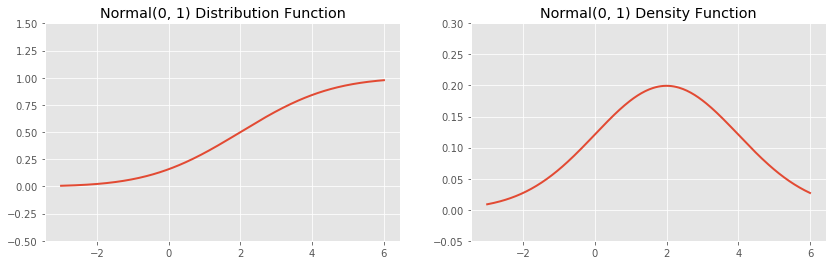

In [38]:
normal = spl.Normal(2, 2)

x = np.linspace(-3, 6, num=250)
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

ax[0].plot(x, normal.cdf(x), linewidth=2)
ax[0].set_ylim(-0.5, 1.5)
ax[0].set_title("Normal(0, 1) Distribution Function")

ax[1].plot(x, normal.pdf(x), linewidth=2)
ax[1].set_ylim(-0.05, 0.3)
ax[1].set_title("Normal(0, 1) Density Function")

What is the data value *most likely to be generated* when sampling from this distribution?

**Question:** Consider a single data value, represented in the plots below as a large black dot.  Which is the *normal distribution most likely to have generated this data point*?  Note, this is the reverse question from the previous one.  Pay attention to possible objections to your answer.

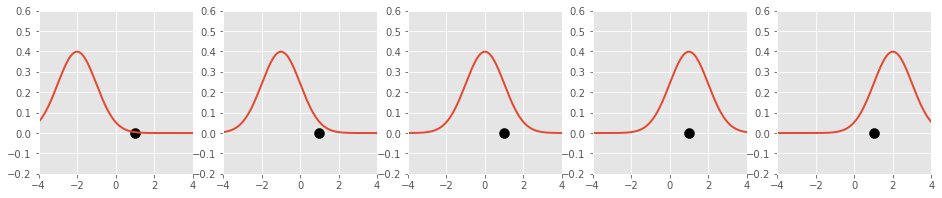

In [39]:
normal_dists_varying_mean = [
    spl.Normal(mu, 1) for mu in [-2, -1, 0, 1, 2]
]

x = np.linspace(-4, 4, num=250)
fig, axs = plt.subplots(1, 5, figsize=(16, 3))

for i, ax in enumerate(axs.flatten()):
    ax.plot(x, normal_dists_varying_mean[i].pdf(x), linewidth=2)
    ax.scatter([1], [0], s=100, c="black")
    ax.set_ylim(-0.2, 0.6)
    ax.set_xlim(-4, 4)

The distribution most likely to generate the point is, intuitively, the one where the *mode* of the distribution *coincides with* the data value.

**Counterpoint:** Isn't the probability that **any** of these distributions generates the data point **exactly** equal to zero?

Said differently, to find the distribution that is most likely to have generated a data point $x$, we find the parameter $\theta$ that maximizes the density function evaluated at $x$

$$ \text{maximize by finding} \ \theta \ \{ f(x; \theta) \} $$

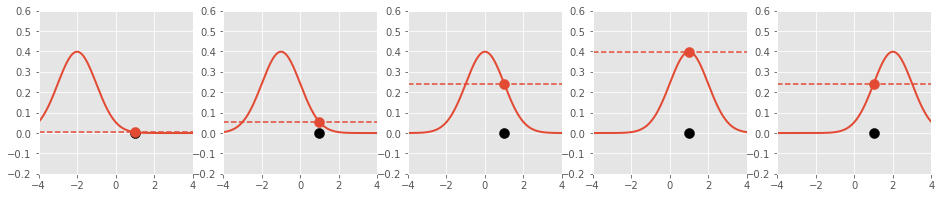

In [40]:
normal_dists_varying_mean = [
    spl.Normal(mu, 1) for mu in [-2, -1, 0, 1, 2]
]

x = np.linspace(-4, 4, num=250)
fig, axs = plt.subplots(1, 5, figsize=(16, 3))

for i, ax in enumerate(axs.flatten()):
    ax.plot(x, normal_dists_varying_mean[i].pdf(x), linewidth=2)
    ax.scatter([1], [0], s=100, c="black")
    ax.scatter([1], [normal_dists_varying_mean[i].pdf(1)], s=100)
    ax.axhline(y=normal_dists_varying_mean[i].pdf(1), linestyle="--") 
    ax.set_ylim(-0.2, 0.6)
    ax.set_xlim(-4, 4)

When our data $x$ is fixed, and we are thinking of changing $\theta$, we call this the *likelihood function*.

$$ L(\theta) = f(x; \theta) $$

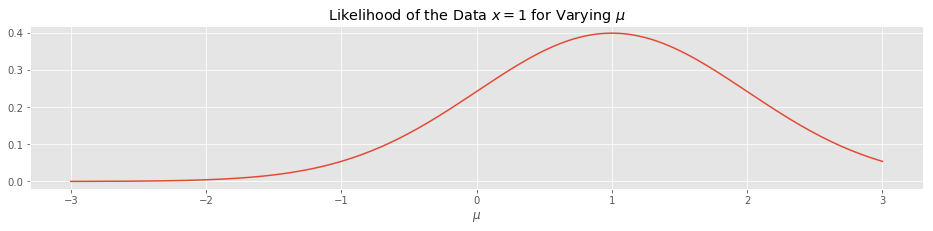

In [41]:
fig, ax = plt.subplots(figsize=(16, 3))

x = 1  # This is the fixed data
t = np.linspace(-3, 3, num=250)

def likelihood(mu):
    normal = spl.Normal(mu, 1)
    return normal.pdf(x)

ax.plot(t, likelihood(t))
ax.set_title("Likelihood of the Data $x = 1$ for Varying $\mu$")
ax.set_xlabel("$\mu$")

### Definition

Suppose $M$ is a statistical model, with a parameter $\theta$.  Then each of the random variables in the model has a density function, and the parameter $\theta$ appears in the density function

$$ f(t; \theta) $$

Denote by $x_i$ a set of data.

The **likelihood function of the model given the data** is a function of the **parameter**, it informally measures the likelihood of observing the data you have as you vary the parameters in the model

$$ L(\theta) = \prod_i f(x_i; \theta) $$

In practice, the log-likelihood is more useful

$$ LL(\theta) = \sum_i \log( f(x_i, \theta) ) $$

To **fit a model by the likelihood method we find the parameters $\theta$ that maximize the likelihood function**.

### Example: Normal Distribution, Unknown Mean and Variance

Let's reuse the normal data from before

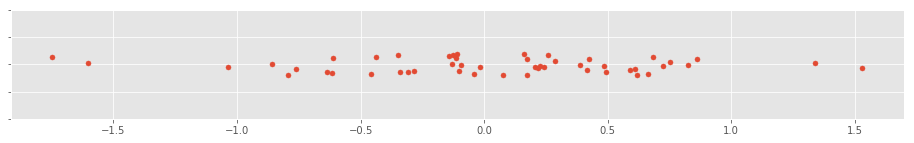

In [42]:
fig, ax = plt.subplots(1, figsize=(16, 2))
one_dim_scatterplot(data, ax, s=25)

And attempt to fit a normal distribution to this data using the likelihood method.

#### Step 1: Write down the model.

Our model contains all normal random variables with varying mean and variance.

$$ M = \{ N(\mu, \sigma^2) \mid \mu \in \mathbb{R}, \sigma^2 \in \mathbb{R}^+ \} $$

#### Step 2: Write down the density functions of all the random variables in the model.

The density function of a normal distribution with unknown mean and variance is:

$$ f(t; \mu, \sigma^2) = \frac{1}{\sqrt{2 \sigma^2 \pi}} e^{ - \frac{(t - \mu)^2}{2 \sigma^2}} $$

This pdf has arguments for both the **data** and the **parameters**:

$$ f(\underbrace{t}_{\text{data}}; \underbrace{\mu, \sigma^2}_{\text{parameters}}) $$

I can access this function in python by using `spl.Normal(mu, sigma).cdf(t)`.

#### Step 3: Write code to compute the log likelihood function of the model given the data.

Remember that the data is *fixed* and we want to vary the *parameters*, so the way we write our function should respect that.

In [43]:
def log_likelihood_normal_two_parameters(mu, sigma_sq):
    normal = spl.Normal(mu, np.sqrt(sigma_sq))
    likelihoods = [normal.pdf(datum) for datum in data]
    return np.sum(np.log(likelihoods))

def minus_log_likelihood_normal_two_parameters(mu, sigma):
    return - log_likelihood_normal_two_parameters(mu, sigma)

As a sanity check, we can evaluate the log-likelihood function at varaious values of the parameters.

In [44]:
for mu, sigma_sq in product([-1, 0, 1], [0.5, 1, 2]):
    print "Log-Lik of Two Parameter Normal Model With mu={0}, sigma_sq={1}: {2:3.2f}".format(
        mu, sigma_sq, log_likelihood_normal_two_parameters(mu, sigma_sq)
    )

Log-Lik of Two Parameter Normal Model With mu=-1, sigma_sq=0.5: -102.80
Log-Lik of Two Parameter Normal Model With mu=-1, sigma_sq=1: -83.04
Log-Lik of Two Parameter Normal Model With mu=-1, sigma_sq=2: -81.82
Log-Lik of Two Parameter Normal Model With mu=0, sigma_sq=0.5: -49.40
Log-Lik of Two Parameter Normal Model With mu=0, sigma_sq=1: -56.34
Log-Lik of Two Parameter Normal Model With mu=0, sigma_sq=2: -68.47
Log-Lik of Two Parameter Normal Model With mu=1, sigma_sq=0.5: -96.01
Log-Lik of Two Parameter Normal Model With mu=1, sigma_sq=1: -79.64
Log-Lik of Two Parameter Normal Model With mu=1, sigma_sq=2: -80.12


Out of all there, the log-likelihood is maximized fo `mu=0, sigma_sq=0.5`, which seems reasonable given the plot of our data.

#### Step 4: Find the parameters that maximize the log-likelihood.

Eyeballing our simple grid search above, it seems like $\mu = 0, \sigma^2 = 0.5$ is the best of what we tried.

In practice, we use an algorithm like *gradient descent* to find a good approximation to the maximal parameters, this process is called **optimization**.

In python, we can use built in optimizer to find the maximal parameters.

In [45]:
# The optimizer needs a function that consumes a single numpy array
def wrapper_for_scipy(x):
    return minus_log_likelihood_normal_two_parameters(x[0], x[1])

fit_parms = optim.minimize(wrapper_for_scipy, (0, 1), method='Nelder-Mead')
mu, sigma_sq = fit_parms.x

print("Log-Lik Optimal Parameters: mu = {0:2.3f}, sigma_sq = {1:2.3f}".format(mu, sigma_sq))

Log-Lik Optimal Parameters: mu = 0.034, sigma_sq = 0.415


**Note**: In this example the estimated parameters using the method of moments vs. Those estimated using maximum likelihood *agree*.  This is a special property of the normal model, and it not true in general.

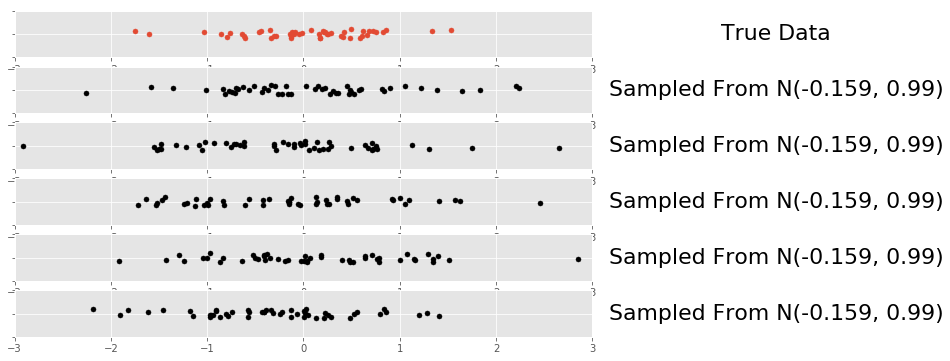

In [46]:
fig = plt.figure(figsize=(16, 6)) 
ax = plt.subplot2grid((6, 3), (0, 0), colspan=2)
ax.set_xlim(-3, 3)
one_dim_scatterplot(data, ax, s=25)
ax = plt.subplot2grid((6, 3), (0, 2), colspan=1)
text_in_blank_plot("True Data", ax)

for i, mu in enumerate(means):
    normal = spl.Normal(mu_hat, np.sqrt(sigma_sq_hat))
    sample = normal.sample(50)
    ax = plt.subplot2grid((6, 3), (i + 1, 0), colspan=2)
    ax.set_xlim(-3, 3)
    one_dim_scatterplot(sample, ax, s=25, c="black")
    ax = plt.subplot2grid((6, 3), (i + 1, 2), colspan=1)
    text_in_blank_plot("Sampled From N({0:0.3f}, {1:0.2f})".format(mu_hat, sigma_sq_hat), ax)

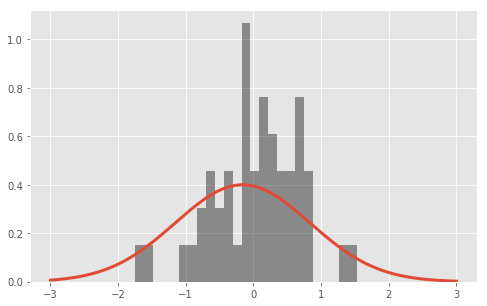

In [47]:
fit_two_param_model = spl.Normal(mu_hat, np.sqrt(sigma_sq_hat))

fig, ax = plt.subplots(1, figsize=(8, 5))
superimpose_pdf_of_fit_model(data, fit_two_param_model, ax)

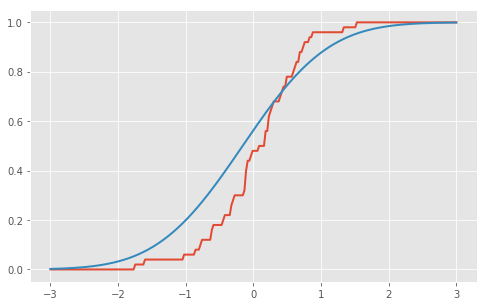

In [48]:
fig, ax = plt.subplots(1, figsize=(8, 5))
superimpose_cdf_of_fit_model(data, fit_two_param_model, ax)

### Uniform Distribution: Both Bounds Unknown

Consider the following data, generated from an unknown uniform distribution.

In [49]:
unif = spl.Uniform(-1.1, 0.9)

unif_data = unif.sample(100)

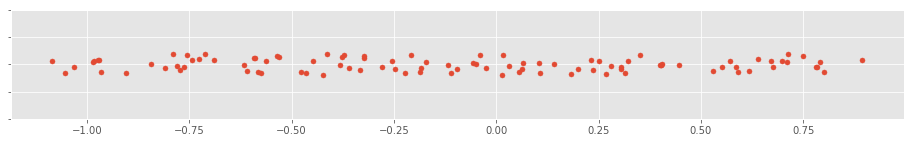

In [50]:
fig, ax = plt.subplots(1, figsize=(16, 2))
one_dim_scatterplot(unif_data, ax, s=25)

Our model is

$$ M = \{ \text{Unif}(a, b) \mid a < b \} $$

which we already derived the method of moments estimates for.  We'll encapsulate this in a function below.

In [51]:
def uniform_method_of_moments(data):
    mu_hat = np.mean(data)
    sigma_sq_hat = np.var(data)
    return mu_hat - np.sqrt(3 * sigma_sq_hat), mu_hat + np.sqrt(3 * sigma_sq_hat)

In [52]:
a, b = uniform_method_of_moments(unif_data)

print("Method of Moments estimates: a = {0:2.2f}, b = {1:2.2f}".format(a, b))

Method of Moments estimates: a = -1.06, b = 0.83


The maximum likelihood estimates of the parameters are

$$ \hat a = \min x_i, \ \hat b = \max x_i $$

**Bonus:** It's a worthwhile exercise to convince yourself this is true.  If you can do so, you really do understand maximum likelihood!

In [53]:
def uniform_maximum_likelihood(data):
    return data.min(), data.max()

In [54]:
a, b = uniform_maximum_likelihood(unif_data)

print("Maximum likelihood estimates: a = {0:2.2f}, b = {1:2.2f}".format(a, b))

Maximum likelihood estimates: a = -1.08, b = 0.89


This time the parameters estimated by the two methods are *different*.

We can check the fit of our model in the usual ways.

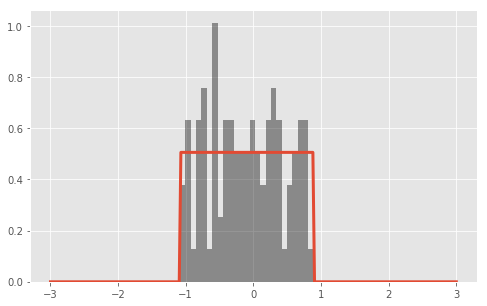

In [55]:
fit_unif_model = spl.Uniform(a, b)

fig, ax = plt.subplots(1, figsize=(8, 5))
superimpose_pdf_of_fit_model(unif_data, fit_unif_model, ax)

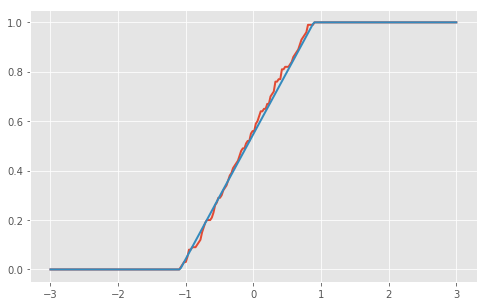

In [56]:
fit_unif_model = spl.Uniform(a, b)

fig, ax = plt.subplots(1, figsize=(8, 5))
superimpose_cdf_of_fit_model(unif_data, fit_unif_model, ax)

# Sampling Theory

## Sampling Distributions of Statistics

Suppose we have independent and identically distributed copies of a random variable $X_1, X_2, \ldots, X_n$; there are many ways to get in this position

  - A random survey of humans is an i.i.d sample of all humans of interest to the survey designers.
  - A dataset of all the quotes received for an insurance product is an i.i.d sample of all possible customers of the insurance company.
  - Driving around a city and turning a random direction at each intersection is an i.i.d sample of all possible paths driven through the city (as long as you start in a random place).
  
A *statistic* is a function of the random sample $T(X_1, X_2, ..., X_n)$.

### Examples

Here are a couple simple and common statistics.  To illustrate, we've drawn 20 samples from a normal distribution and recorded the value of the statistic.

The **sample mean** is a statistic defined by $\frac{1}{n} \sum_i X_i$

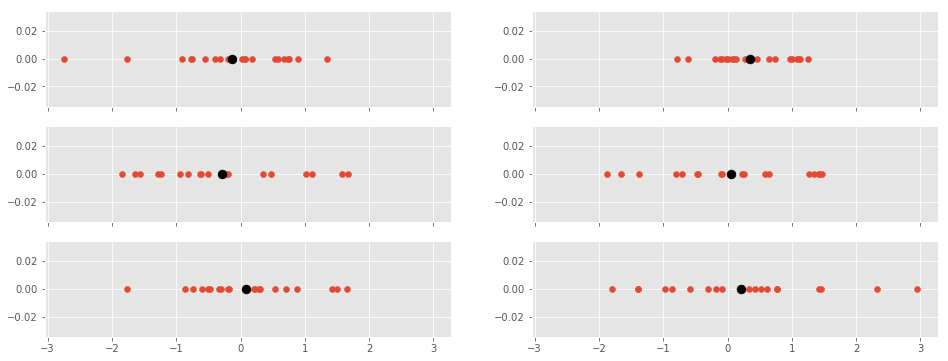

In [107]:
normal = spl.Normal(0, 1)

fig, axs = plt.subplots(3, 2, figsize=(16, 6), sharex=True)

for ax in axs.flatten():
    samp = normal.sample(20)
    ax.scatter(samp, np.repeat(0, 20))
    mean = np.mean(samp)
    ax.scatter([mean], 0, c="black", s=80)

The **sample maximum** is defined by $\max (X_1, X_2, \ldots, X_n)$

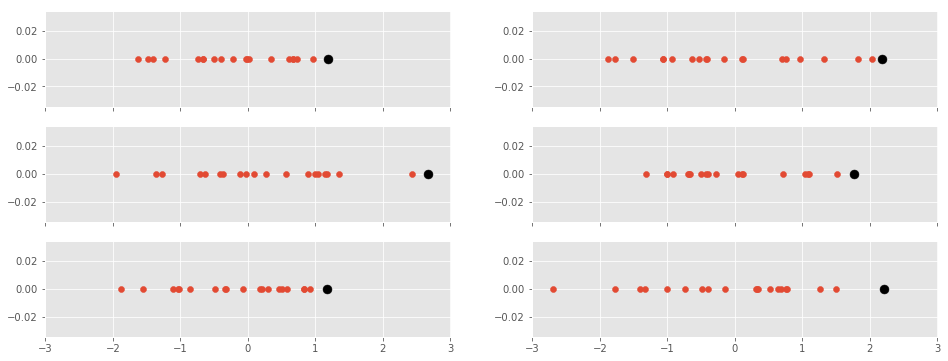

In [108]:
normal = spl.Normal(0, 1)

fig, axs = plt.subplots(3, 2, figsize=(16, 6), sharex=True)

for ax in axs.flatten():
    samp = normal.sample(20)
    ax.scatter(samp, np.repeat(0, 20))
    M = np.max(samp)
    ax.scatter([M], 0, c="black", s=80)

**Question:** What is another sample statistic that is commonly encountered?

Each time we draw a new sample, we compute a slightly different value of the statistic.  This makes the *statistic itself* a random variable.  The variation in the statistic comes from the different samples that we may draw from the random variable.

### The Main Question In Sampling Theory:

How do we **quantify** the amount of varaition of a smaple statistic?

To quantify the amount of variation of a statistic, we need a process like this:

  - Draw some number of independent and identically distributed samples from $X$.
  - Compute the statistic using the sample you drew.
  - Record the statistic as computed from the sample.
  - Do it again, and again, and again.
  
After this process is complete, we have many examples of our statistic, each computed from a different random sample from our variable.

The distribution of *the statistic* that arises from this process is called the *sampling distribution of the statistic*.

### Example: Sample Means from A Normal Variable

Recall our sample means from the previous example:

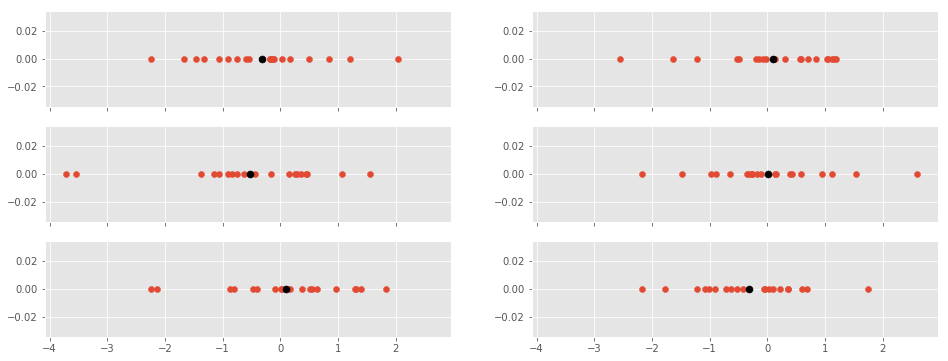

In [59]:
normal = spl.Normal(0, 1)

fig, axs = plt.subplots(3, 2, figsize=(16, 6), sharex=True)

means = []
for ax in axs.flatten():
    samp = normal.sample(20)
    ax.scatter(samp, np.repeat(0, 20))
    mean = np.mean(samp)
    means.append(mean)
    ax.scatter([mean], 0, c="black", s=50)

The distribution of the *red points* is the **sampling distribution of the mean**.

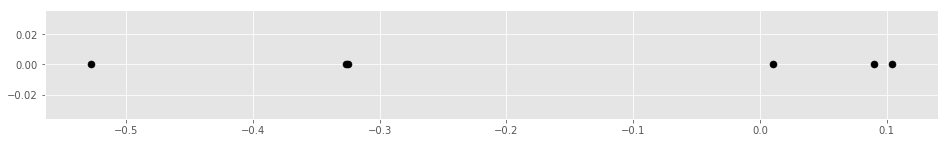

In [60]:
fig, ax = plt.subplots(1, 1, figsize=(16, 2))
ax.scatter(means, np.repeat(0, 6), c='black', s=50)

If we superimpose a sample from the original distribution, it's very clear that the spread of the sampling distribution is much smaller than that of the original.

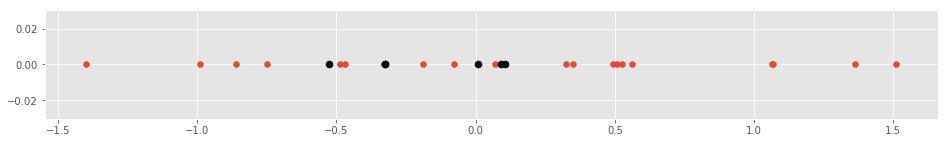

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(16, 2))
ax.scatter(normal.sample(20), np.repeat(0, 20))
ax.scatter(means, np.repeat(0, 6), c='black', s=50)

Two questions present themselves:

  - What is the average value of the statistic?
  - How much does the statistic vary around its average value?

## The Law of Large Numbers

Let's focus on the simplest and possibly the most natural statistic: the *mean* of a random sample.  To be clear:

  - The **mean**, or **expectation** of a random variable is the theoretical quantity computed by the following integral:
  
$$ E[X] = \int_{- \infty}^{\infty} t \
f_{X}(t) dt $$

It is a property of a random variable, and you *must* know the distribution of the variable *completely* to compute it.  This *never* happens in real life, the application of computing a mean of a random variable in this way is when we hypothesize *models* of our data, we'll get to that.

  - The **sample mean** of a set of *data* (which is often postulated to result from an i.i.d sample from a random variable) is the *practical* quantity computed as the following sum:
  
$$\frac{1}{n} \sum_i X_i$$

When both concepts are relevant, we often qualify the first from the second by using the term **population mean**.  the word **population** refers to a hypothesized random variable that is generating the data.

**Note:** While the names betray a connection, it's important to realize that these two concepts are just *definitions*, subject to our whim.

The fundamental connection between the two concepts is given by the *law of large numbers*.

### The Law of Large Numbers.

Suppose that $X_1, X_2, \ldots$ are i.i.d copies of a random variable $X$.  Then, for $n$ sufficiently large, the sample mean computed from a sample of size $n$ is approximately equal to the population mean:

$$ \frac{1}{n} \sum_i X_i \approx E[X] $$

**Note** The precise mathematical statement of the law of large numbers needs some more technology, namely *convergence in probability*.  It essentially says that, as $n$ get large, the probability of seeing a sample mean that is different from the population mean goes to zero.

### Example:  Binomial Draws

Suppose that $X$ is a simple Bernoulli random variable, for implicitly

$$ X \sim \text{Bernoulli}(p = 0.5) $$

In each of the plots below, we draw samples of increasing size from $X$, and compute the corresponding sample mean.  According to the law of large numbers, these paths of sample means should all limit towards the population expectation of $p = 0.5$.

In [62]:
def compute_cumlative_sample_means(sample):
    cumlative_sums = np.cumsum(sample)
    sample_sizes = np.arange(1, len(cumlative_sums) + 1)
    sample_means = cumlative_sums / sample_sizes
    return sample_sizes, sample_means

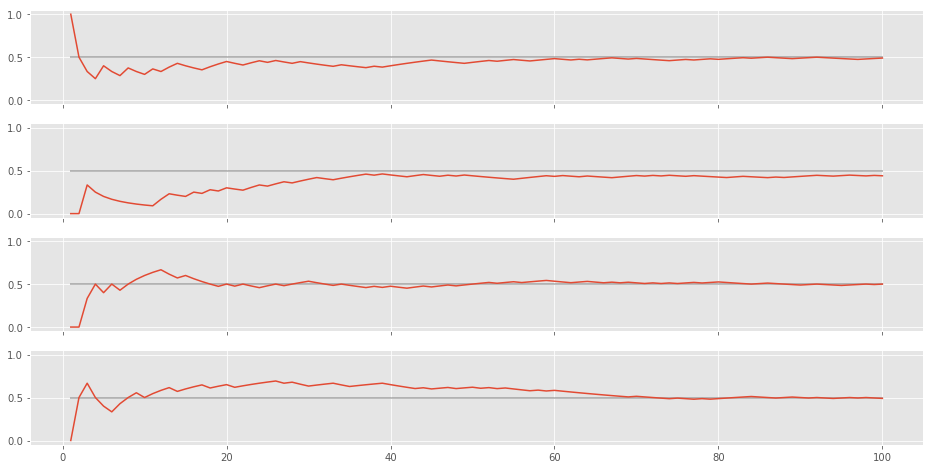

In [63]:
bernoulli = spl.Binomial(1, 0.5)

fig, axs = plt.subplots(4, 1, figsize=(16, 8), sharex=True, sharey=True)

for ax in axs.flatten():
    sample = bernoulli.sample(100).astype(np.float64)
    sample_sizes, sample_means = compute_cumlative_sample_means(sample)
    ax.plot(sample_sizes, np.repeat(0.5, len(sample_sizes)), linewidth=2, c='grey', alpha=0.5)
    ax.plot(sample_sizes, sample_means)

**Note Well:** The law of large numbers does **not** say that the number of $0$'s sampled becomes equal to the number of $1$'s sampled as $n$ grows, **only that the differences between them are swamped out as the denominator gets large**.

If you flip a coin an infinite number of times, you should *not* expect to get "the same number of heads as tails".  Statistics does *not* say they cancel out.  Only that the differences become less noticeable over time with respect to the magnitude of numbers involved.

In [64]:
def compute_cumlative_sample_differences(sample):
    ones_and_negative_ones = sample + (sample - 1)
    cumlative_sums = np.cumsum(ones_and_negative_ones)
    sample_sizes = np.arange(1, len(cumlative_sums) + 1)
    return sample_sizes, cumlative_sums

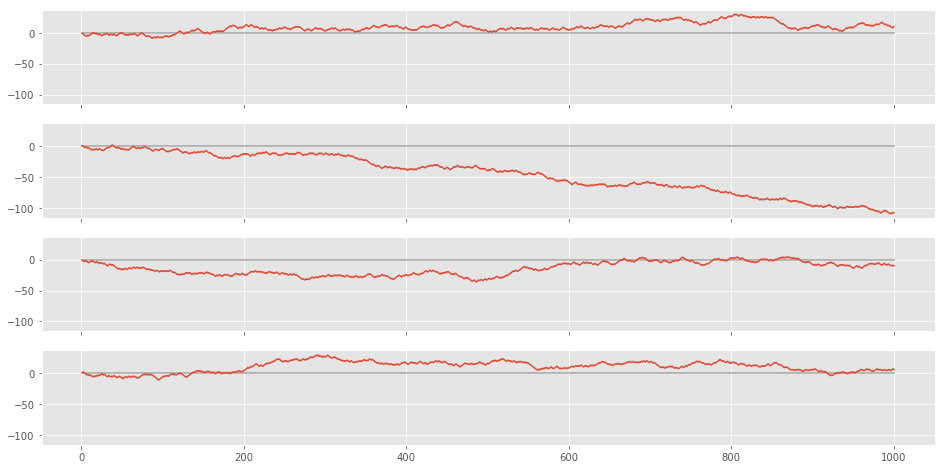

In [65]:
bernoulli = spl.Binomial(1, 0.5)

fig, axs = plt.subplots(4, 1, figsize=(16, 8), sharex=True, sharey=True)

for ax in axs.flatten():
    sample = bernoulli.sample(1000).astype(np.float64)
    sample_sizes, sample_differences = compute_cumlative_sample_differences(sample)
    ax.plot(sample_sizes, np.repeat(0, len(sample_sizes)), linewidth=2, c='grey', alpha=0.5)
    ax.plot(sample_sizes, sample_differences)

In fact, if you plot many of these curves on one graph, you can see that in aggregate, they spread out over time

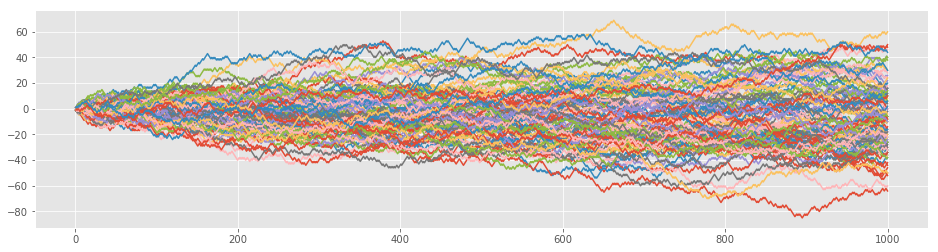

In [66]:
bernoulli = spl.Binomial(1, 0.5)

fig, ax = plt.subplots(1, 1, figsize=(16, 4), sharex=True, sharey=True)

for i in range(100):
    sample = bernoulli.sample(1000).astype(np.float64)
    sample_sizes, sample_differences = compute_cumlative_sample_differences(sample)
    #ax.plot(sample_sizes, np.repeat(0, len(sample_sizes)), linewidth=2, c='grey', alpha=0.5)
    ax.plot(sample_sizes, sample_differences)    

One way to interpret the law of large numbers is that the sample means are spreading out *slower* than that rate of increase of sample size.

## The Variance of the Sample Mean

The law of large numbers tells us that the sample mean is an estimate of the population mean.  A follow up question now arises: **how accurate of an estimate of the population mean is the sample mean?**

Recall our observation that the sample mean has less variance than the sample itself, it's actually possible to quantify how much less variance:

$$ var \left( \frac{X_1 + X_2 + \cdots + X_n}{n} \right) = \frac{1}{n^2} var (X_1 + X_2 + \cdots + X_n) = \frac{n}{n^2} var(X) = \frac{1}{n} var (X) $$

$$ sd \left( \frac{X_1 + X_2 + \cdots + X_n}{n} \right) = \frac{1}{\sqrt{n}} sd (X) $$

**Note** The variance of a sum is not usually the sum of the variances, we are using the assumption that we have an i.i.d sample here!

**Question:** What is the expectation of the sample means?

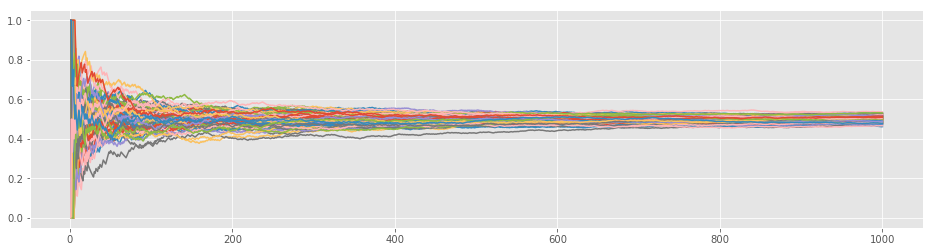

In [67]:
bernoulli = spl.Binomial(1, 0.5)

fig, ax = plt.subplots(1, 1, figsize=(16, 4), sharex=True, sharey=True)

for i in range(100):
    sample = bernoulli.sample(1000).astype(np.float64)
    sample_sizes, sample_means = compute_cumlative_sample_means(sample)
    #ax.plot(sample_sizes, np.repeat(0, len(sample_sizes)), linewidth=2, c='grey', alpha=0.5)
    ax.plot(sample_sizes, sample_means)    

## The Bootstrap

It seems hard to verify this computation in any concrete specific situation.  

We generally have one fixed dataset, which we view as a single sample from the population.  **The population is the object that interests us, and the sample is the lens through which we get to view it.**

The idea behind the bootstrap is that the **empirical distribution** of the sample should be our **best approximation** to the distribution of the population the sample is drawn from.  We can illistrate this by comapring the emperical distribution functions of samples to the actual population distribution functions:

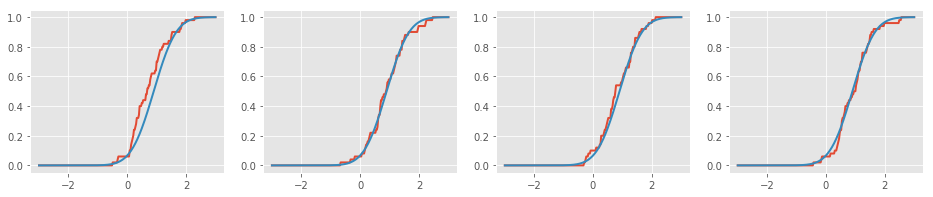

In [68]:
population = spl.Normal(0.9, 0.6)

fig, axs = plt.subplots(1, 4, figsize=(16, 3))

for ax in axs.flatten():
    sample = population.sample(50)
    superimpose_cdf_of_fit_model(sample, population, ax)    

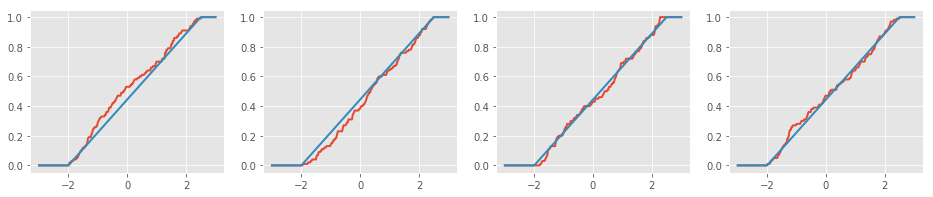

In [69]:
population = spl.Uniform(-2, 2.5)

fig, axs = plt.subplots(1, 4, figsize=(16, 3))

for ax in axs.flatten():
    sample = population.sample(100)
    superimpose_cdf_of_fit_model(sample, population, ax)   

This means that  **since we cannot repeatedly sample from the population, our next best bet is to sample from the sample itself**.

### Bootstrap: The Big Idea

We want to do this:

> Estimate the variance of the sample means by repeatedly sampling from the population, computing the sample means of these samples, and then computing the variance of the multiple sample means.

But we **can't**, because we can **only sample from the population one time**.

Instead, we repeatedly sample from our **best approximation to the population distribution**, which is given by the **empirical density function of the sample**.

That is, instead we do

> Estimate the variance of the sample means by repeatedly sampling from *a distribution approximating the population distribution*, computing the sample means of these samples, and then computing the variance of the multiple sample means.

### Definition

A **bootstrap sample** from a dataset is a sample taken with replacement from that dataset whose size is the size of the dataset itself.

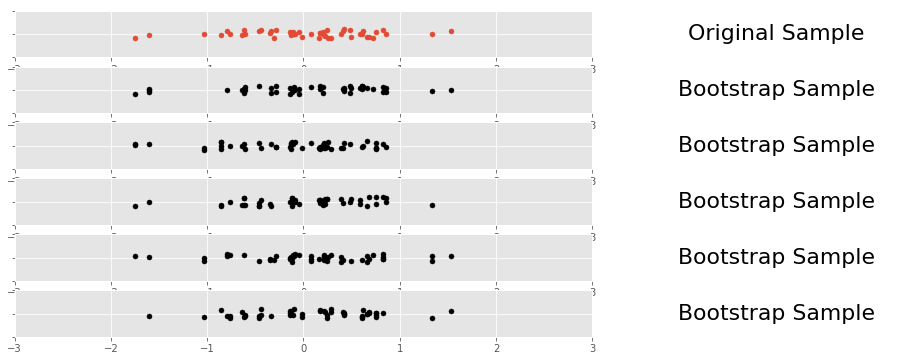

In [70]:
fig = plt.figure(figsize=(16, 6))

ax = plt.subplot2grid((6, 3), (0, 0), colspan=2)
ax.set_xlim(-3, 3)
one_dim_scatterplot(data, ax, s=25)
ax = plt.subplot2grid((6, 3), (0, 2), colspan=1)
text_in_blank_plot("Original Sample", ax)

for i in range(0, 5):
    bootstrap = np.random.choice(data, size=len(data), replace=True)
    ax = plt.subplot2grid((6, 3), (i + 1, 0), colspan=2)
    ax.set_xlim(-3, 3)
    one_dim_scatterplot(bootstrap, ax, s=25, c="black")
    ax = plt.subplot2grid((6, 3), (i + 1, 2), colspan=1)
    text_in_blank_plot("Bootstrap Sample", ax)

Each bootstrap sample has it's **own** sample mean

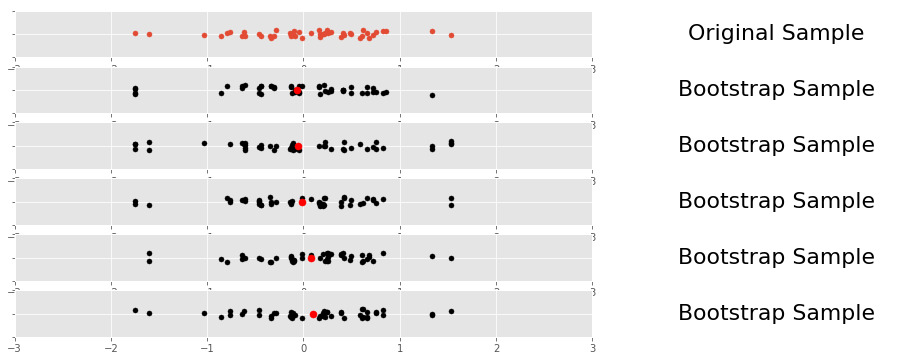

In [71]:
fig = plt.figure(figsize=(16, 6))

ax = plt.subplot2grid((6, 3), (0, 0), colspan=2)
ax.set_xlim(-3, 3)
one_dim_scatterplot(data, ax, s=25)
ax = plt.subplot2grid((6, 3), (0, 2), colspan=1)
text_in_blank_plot("Original Sample", ax)

for i in range(0, 5):
    bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
    ax = plt.subplot2grid((6, 3), (i + 1, 0), colspan=2)
    ax.set_xlim(-3, 3)
    one_dim_scatterplot(bootstrap_sample, ax, c="black", s=25)
    sample_mean = np.mean(bootstrap_sample)
    ax.scatter([sample_mean], 0, c="red", s=50)
    ax = plt.subplot2grid((6, 3), (i + 1, 2), colspan=1)
    text_in_blank_plot("Bootstrap Sample", ax)

The sample means taken from repeated bootstrap samples are then an approximation to the **distribution of the sample means**

In [72]:
def bootstrap_sample_means(data, n_bootstrap_samples=100):
    bootstrap_sample_means = []
    for i in xrange(n_bootstrap_samples):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_sample_means.append(np.mean(bootstrap_sample))
    return bootstrap_sample_means

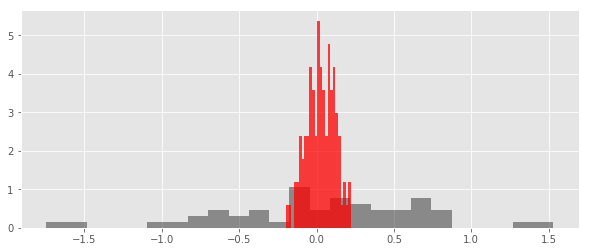

In [73]:
bootstrap_means = bootstrap_sample_means(data)

fig, ax = plt.subplots(1, figsize=(10, 4))
_ = ax.hist(data, bins=25, normed=True, color="black", alpha=0.4)
_ = ax.hist(bootstrap_means, bins=25, normed=True, color="red", alpha=0.75)

Clearly, the variance of the sample means is *much* smaller than the variance of the data.

In [74]:
variance_of_sample = np.var(data)
varaince_of_bootstrap_means = np.var(bootstrap_means)

print("Variance of Sample: {:2.2f}".format(variance_of_sample))
print("Variance of Sample Means: {:2.2f}".format(varaince_of_bootstrap_means))
print("Ratio of Sample Varaince to SDOtM Varaince: {:2.2f}".format(
    variance_of_sample/varaince_of_bootstrap_means))

Variance of Sample: 0.41
Variance of Sample Means: 0.01
Ratio of Sample Varaince to SDOtM Varaince: 51.32


The variance of the sample means of the bootstrap samples is then an estimate of the variance of the sample mean.

This is consistent with our calculation above: the ratio of the variance of the sample to the variance of the sample means is approximately the size of the sample.

### The Point

The Bootstrap is a tool to **quantify the variation in a statistical estimate**.  It can be used in almost **any** situation.

**Question:** Are there any statistics where the bootstrap will *not* work to quantify variation?

## The Central Limit Theorem

The bootstrap works for approximating the sampling distribution of *any* statistic.  It's flexibility makes it a fundamental tool in the box of **any** statistician or data scientist.

There is **exactly one** special case where the bootstrap is superseded due to a mathematical miracle.

Let's return to the distribution of a very popular statistic, the **distribution of the sample means**.

Consider a fixed population, and for the moment, suppose we have the power to sample freely, as many data points as we wish

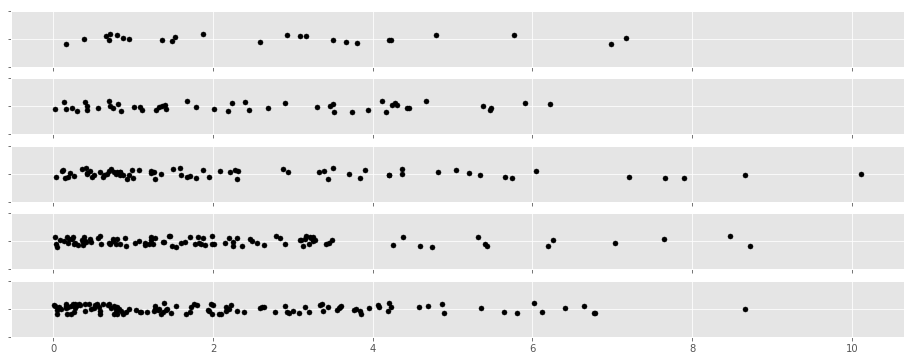

In [75]:
fig, axs = plt.subplots(5, figsize=(16, 6), sharex=True)

population = spl.Exponential(2)
sample_sizes = [25, 50, 75, 100, 125]
for sample_size, ax in zip(sample_sizes, axs.flatten()):
    sample = population.sample(sample_size)
    one_dim_scatterplot(sample, ax, s=25, c="black")

Suppose we fix a sample size, and repeatedly sample from the population with that fixed size

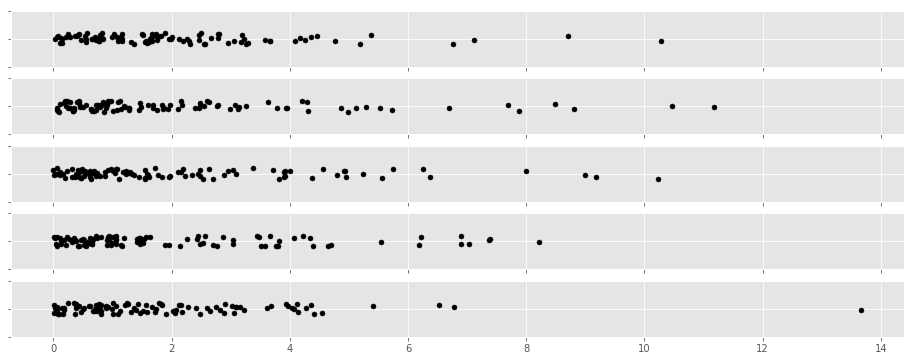

In [76]:
fig, axs = plt.subplots(5, figsize=(16, 6), sharex=True)

for sample_size, ax in zip(sample_sizes, axs.flatten()):
    sample = population.sample(100)
    one_dim_scatterplot(sample, ax, s=25, c="black")

Remember, the **sampling distribution of the mean** is the distribution of the means computed from these *different samples*.

Let's do that, let's repeatedly sample, compute the means of the samples, then plot the distribution of these means.

In [77]:
def smfp(n_samples, n_summands, sampler): 
    return (1.0/n_summands) * spl.sample_from_repeated_sum(n_samples, n_summands, sampler)

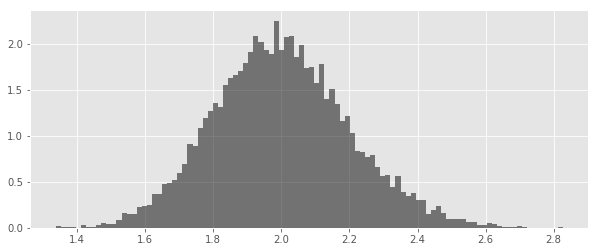

In [78]:
sample_means = smfp(n_samples=10000, n_summands=100, sampler=population)

fig, ax = plt.subplots(1, figsize=(10, 4))
_ = ax.hist(sample_means, bins=100, normed=True, color="black", alpha=0.5)

That distribution looks quite familiar.

Let's overlay a normal distribution with the correct mean and variance.

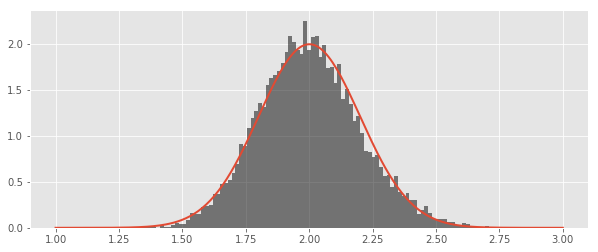

In [79]:
mean_sample_means = np.mean(sample_means)
variance_sample_means = np.var(sample_means)

sample_means_model = spl.Normal(mean_sample_means, np.sqrt(variance_sample_means))
fig, ax = plt.subplots(1, figsize=(10, 4))
_ = ax.hist(sample_means, bins=100, normed=True, color="black", alpha=0.5)
x = np.linspace(1, 3, num=250)
ax.plot(x, sample_means_model.pdf(x), linewidth=2)

Yah, that looks pretty close.

The **central limit theorem** asserts that as we take the mean of larger and larger samples, the distribution of sample means becomes more and more normal.

Said differently, probabilistic statements about the mean of a large sample can be well approximated by assuming that the distribution of the sample means is a normal distribution with the correct mean and variance.

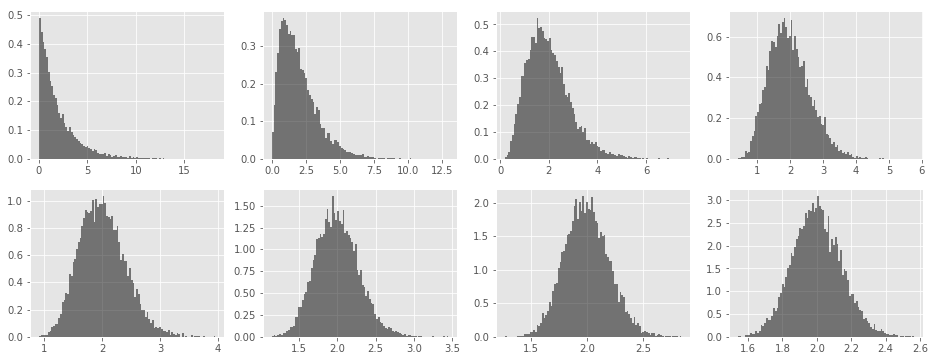

In [80]:
size_of_sample = [1, 2, 5, 10, 25, 50, 100, 200]

fig, axs = plt.subplots(2, 4, figsize=(16, 6))

for sample_size, ax in zip(size_of_sample, axs.flatten()):
    sample_means = spl.sample_means_from_population(
        n_samples=10000, n_summands=sample_size, sampler=population)
    _ = ax.hist(sample_means, bins=100, normed=True, color="black", alpha=0.5)


### The Central Limit Theorem

Suppose $X_1, X_2, \ldots$ are i.i.d. copies of a random varaiable with finite expectation and variance

$$ E[X_1] = E[X_2] = \cdots = \mu $$
$$ var[X_1] = var[X_2] = \cdots = \sigma^2 $$

Then the distribution of sample means tends to a normal distribution with the appropriate mean and standard deviation:

$$ \frac{X_1 + X_2 + \cdots + X_k}{k} \rightarrow N \left( \mu, \frac{\sigma}{\sqrt{k}} \right) $$

as $k \rightarrow \infty$.

**Note:** The CLT also applies to a simple sum, though the mean and variance are different

$$ X_1 + X_2 + \cdots + X_k \rightarrow N \left( k \mu, \sqrt{k} \sigma \right) $$


A couple of notes

  - The stunning part of the central limit theorem is that it makes almost no assumptions about $X$.  $X$ can be anything, and it's sample means will always tend to be normal.
  - The central limit theorem is a **miracle**, pure and simple.  There is no real *reason* it is true, it just is.  Consider it a gift of rare order in the universe, more like a fundamental law of physics than an intuitive mathematical fact.
  - Here's an elevator pitch statement of the central limit theorem, good for job interviews: **The central limit theorem allows us to make probabilistic statements about the sample mean from any population using the normal distribution.**

### Example

Consider a binomial distribution $Binom(n, p)$, which assigns probabilities to the number of heads shown in $n$ flips of a coin where the probability of seeing a head in a **single flip** is $p$.

Consider a variable $X$ which is distributed as binomial

$$ X \sim Binom(n, p) $$

and also a ton of variables representing a **single coin flip**

$$ X_1, X_2, \ldots \sim Binom(1, p) $$

**Claim:** $X \sim X_1 + X_2 + \cdots + X_n$

**Question:** Why?

The central limit theorem has an immediate consequence:  Binomial distributions with large $n$ tend to be approximately normal!

$$ Binom(n, p) \sim N(np, \sqrt{n p (1 - p)} ) $$

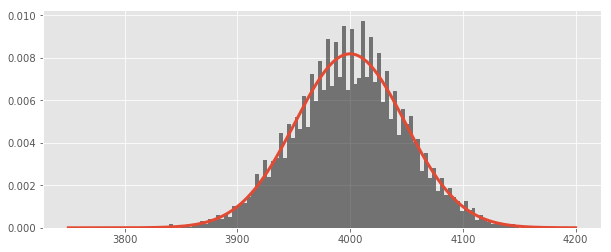

In [81]:
binomial = spl.Binomial(10000, 0.4)
binomial_sample = binomial.sample(10000)

binomial_sample_mean = np.mean(binomial_sample)
binomial_sample_variance = np.var(binomial_sample)
normal_approx = spl.Normal(binomial_sample_mean, np.sqrt(binomial_sample_variance))

fig, ax = plt.subplots(1, figsize=(10, 4))
_ = ax.hist(binomial_sample, bins=100, normed=True, color="black", alpha=0.5)
x = np.linspace(3750, 4200, num=250)
ax.plot(x, normal_approx.pdf(x), linewidth=3)

An immediate consequence: Binomial probabilities with large $n$ can be well approximated using the normal distribution.

#### Important Note

The central limit theorem let's us make probabilistic statements about a very specific sample statistic: the sample mean.  Because of this, much emphasis is placed on the sample mean in many courses on statistics.

**The sample mean is not the only important statistic**, if you are trying to estimate hurricane losses, the mean loss is probably not as important as, say, the *maximum possible loss*.  The central limit theorem has **nothing** to say about this situation.

The central limit theorem is an important tool, but it is not **general**.  Other tools would be rightfully viewed as more important, i.e. bootstrapping.

### The Point

When we are concerned with a **sample mean**, the central limit theorem lets us derive the **actual distribution of the sample mean**.  This allows us to calculate probabilities about the sample mean.

## Capturing Population Parameters: Confidence Intervals

Recall our statement from earlier

> Our general interest is in the **population**, the **sample** is just the lens we get to view it through.

We have shown that **sample statistics are generally good approximations of properties of the population**, and we have also discovered **methods for approximating the distribution of sample statistics**  such as bootstrapping and the central limit theorem.

Together these allow us to address a final question

> How good of an approximation of a population parameter is a sample statistic?

#### Example: Confidence Interval for the Sample Mean

Consider our sample from a secret population, which we have used as a running example

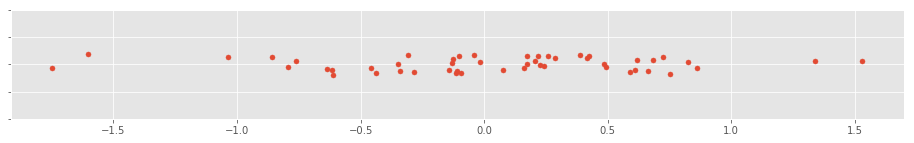

In [82]:
fig, ax = plt.subplots(1, figsize=(16, 2))
one_dim_scatterplot(data, ax, s=25)

Here are the facts we have accumulated about this situation

  - The sample mean is an approximation of the population mean: the expected value of the sample mean *is* the population mean.
  - The sample mean is approximately normally distributed, the mean and variance of this normal distribution can be computed in terms of the population mean and variance, and the size of the sample.
  
Let's denote by 
  - $\mu$ the population mean.
  - $\sigma^2$ the population variance.
  - $\bar x$ the **sample mean**.
  
Then we can summarize all this as

$$ \bar x \sim N \left( \mu, \frac{\sigma}{\sqrt{n}} \right) $$

If we subtract the population mean from both sides we get

$$ \bar x - \mu \sim N \left( 0, \frac{\sigma}{\sqrt{n}} \right) $$

Which allows us to make probabilistic statements about how far the sample mean is from the population mean.

A **confidence interval** is the answer to a question like this

> How far do I have to go to the left and the right of the sample mean so that 95% of the time (i.e. in 95% of possible samples) I will have enclosed the population mean?

Let $\alpha$ denote the distance you move to the left and right of the sample mean when drawing your interval.  In notation, we are asking to find $\alpha$ such that

$$ P(\bar x - \alpha \leq \mu \leq \bar x + \alpha) = 0.95 $$

This is the same as asking for

$$ P( - \alpha \leq \mu - \bar x \leq \alpha ) = 0.95 $$

Which is, visually:

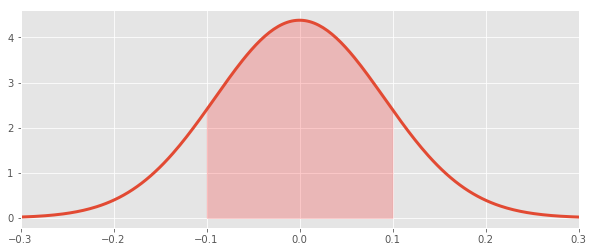

In [83]:
sample_mean = np.mean(data)
sample_varaince = np.var(data)
distribution_of_sample_minus_population_mean = spl.Normal(0, np.sqrt(sample_varaince / len(data)))

fig, ax = plt.subplots(1, figsize=(10, 4))
x = np.linspace(-0.3, 0.3, num=250)
pdf = distribution_of_sample_minus_population_mean.pdf(x)
ax.plot(x, pdf, linewidth=3)

# Shade under curve
ax.set_xlim(-0.3, 0.3)
ax.fill_between(x, pdf, 0, where=( (-0.1 <= x) * (x <= 0.1) ), color="red", alpha=0.2)

The shaded region is the area under the density between $-\alpha$ and $\alpha$. We want the **shaded region** to account for $0.95$ of the total area.

This means that each *half* of the shaded area to the *left and right* of zero should account for $0.475$ of the total area.

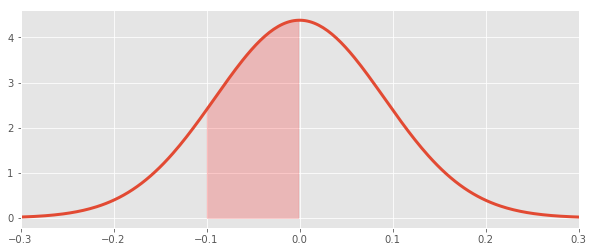

In [84]:
fig, ax = plt.subplots(1, figsize=(10, 4))

ax.plot(x, pdf, linewidth=3)

# Shade under curve
ax.set_xlim(-0.3, 0.3)
ax.fill_between(x, pdf, 0, where=( (-0.1 <= x) * (x <= 0.0) ), color="red", alpha=0.2)

Which means that the "tail" to the left of $\alpha$ should account for $0.5 - 0.475 = 0.025$ of the total area.

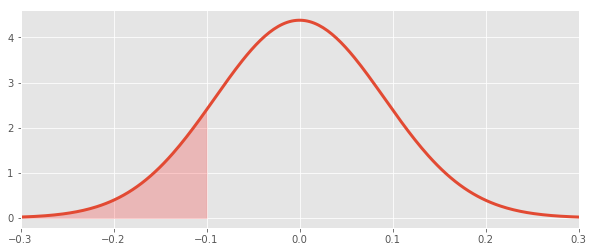

In [85]:
fig, ax = plt.subplots(1, figsize=(10, 4))

ax.plot(x, pdf, linewidth=3)

# Shade under curve
ax.set_xlim(-0.3, 0.3)
ax.fill_between(x, pdf, 0, where=( (x <= -0.1) ), color="red", alpha=0.2)

It is **this kind of area that is computed by the distribution function**.

So, if we denote by $F$ the **distribution function of** $ N \left( 0, \frac{\sigma}{\sqrt{n}} \right) $, then we are after the value of $\alpha$ satisfying

$$ F(-\alpha) = 0.025 $$

Or $$F^{-1}(0.025) = -\alpha$$

The **inverse of the distribution function** is often called the **percentile function**.

In [86]:
alpha = distribution_of_sample_minus_population_mean.percentile(0.025)
print("Sample Mean: {:2.2}".format(sample_mean))
print("95% confidence interval for the population mean: [{:2.2}, {:2.2}]".format(
    sample_mean + alpha, sample_mean - alpha)
    )

Sample Mean: 0.034
95% confidence interval for the population mean: [-0.14, 0.21]


Recall our interpretation here

> If we draw samples from the population and compute this confidence interval many, many times, then the computed interval should envelop the true population parameter approximately 95% of the time.

In this case, I wrote the code to create the population, so I know the correct answer

**The population mean is $0.1$.**

So let's run a simulation and see if everything worked.

In [87]:
def compute_confidence_interval(data, confidence_width):
    sample_mean = np.mean(data)
    sample_varaince = np.var(data)
    distribution_of_sample_minus_population_mean = spl.Normal(0, np.sqrt(sample_varaince / len(data)))
    alpha = distribution_of_sample_minus_population_mean.percentile(0.5 - (confidence_width / 2.0))
    # Alpha is negative
    return sample_mean + alpha, sample_mean - alpha

In [88]:
population_mean_is_in_interval = []
for i in xrange(1000):
    new_data = spl.secret_data()
    left_endpoint, right_endpoint = compute_confidence_interval(new_data, 0.95)
    population_mean_is_in_interval.append(left_endpoint <= 0.1 <= right_endpoint)
    
print("Proportion of confidence intervals containing the true parameter: {:2.2f}".format(
        np.mean(population_mean_is_in_interval)))

Proportion of confidence intervals containing the true parameter: 0.94


Which is what we would expect.

To dive the point home, we can plot all of these confidence intervals along with the true parameter, and visually see which do and do not contain the parameter.

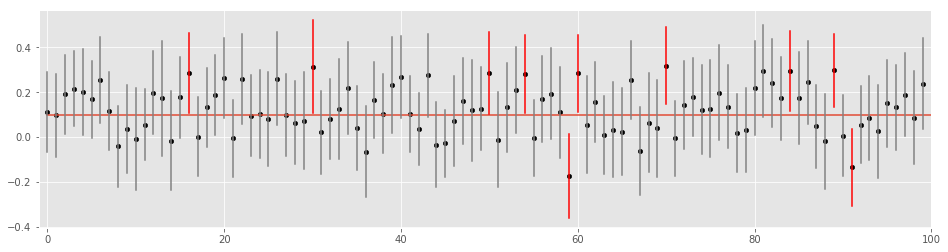

In [89]:
fig, ax = plt.subplots(1, figsize=(16, 4))
ax.plot([0, 100], [0.1, 0.1])

for i in xrange(100):
    new_data = spl.secret_data()
    sample_mean = new_data.mean()
    left_endpoint, right_endpoint = compute_confidence_interval(new_data, 0.95)
    color = "grey" if (left_endpoint <= 0.1 <= right_endpoint) else "red"
    ax.plot([i, i], [left_endpoint, right_endpoint], color=color)
    ax.scatter([i], [sample_mean], c="black", s=20)
    ax.set_xlim(-1, 100)

### Example: Bootstrap Confidence Interval for 75'th Percentile

The above example relied on the central limit theorem to provide the sampling distribution of the statistic, which is only possible for very specific sample statistics.

Consider estimating a confidence interval of the 75'th percentile of a population.  In this case, the central limit theorem does not allow us to derive a mathematical form of the sampling distribution, instead we can proceed by using bootstrap sampling.

Here is the bootstrap procedure for computing a confidence interval for a 75'th percentile

  - Draw many bootstrap samples from your main sample, and for each:
    - Compute the sample statistic (using the bootstrap sample)
  - Gather together all the sample statistics of the various bootstrap samples into a list.
  
The resulting list can be considered as a sample from the sampling distribution of the statistic.

  - Compute the 95% confidence interval by finding the 0.025 and 0.975 percentiles of the resulting list of sample statistics.

In [90]:
bootstrap_sample_75_percentiles = []
for i in range(1000):
    bootstrap = np.random.choice(data, size=len(data), replace=True)
    bootstrap_75_percentile = np.percentile(bootstrap, 75)
    bootstrap_sample_75_percentiles.append(bootstrap_75_percentile)

This code creates an approximation the the sampling distribution of the statistic.

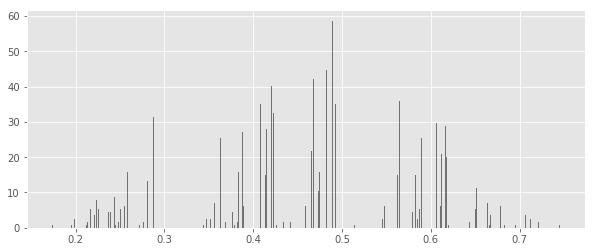

In [91]:
fig, ax = plt.subplots(1, figsize=(10, 4))
_ = ax.hist(bootstrap_sample_75_percentiles, bins=500, normed=True, color="black", alpha=0.5)

We get a confidence interval by computing the 0.025 and 0.975 percentiles of the resulting sampling distribution approximation

In [92]:
left_endpoint = np.percentile(bootstrap_sample_75_percentiles, 2.5)
right_endpoint = np.percentile(bootstrap_sample_75_percentiles, 97.5)

print("Sample 75'th Percentile: {:2.2f}".format(np.percentile(data, 75)))
print("Bootstrap Confidence Interval for Population 75'th Percentile: [{:2.2f}, {:2.2f}]".format(
    left_endpoint, right_endpoint))

Sample 75'th Percentile: 0.47
Bootstrap Confidence Interval for Population 75'th Percentile: [0.22, 0.66]


**Question:** Why is this confidence interval not symmetric?